In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten, AlphaDropout, SpatialDropout2D, Cropping2D
from keras.constraints import maxnorm
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

Using TensorFlow backend.


In [2]:
# preprocessing
np.set_printoptions(threshold=20000)

# load data
image_data='train_images.npy'
label_data='train_labels.csv'

# images = np.load(image_data, encoding='latin1')
images = np.load(image_data, encoding='latin1')[:,1]
labels = np.loadtxt(label_data, dtype=str, encoding='latin1', delimiter=',')[1:,1]

In [3]:
# a=[]
# for i in range(len(images)):
#     image1 = (images[i][1]).reshape(100,100)
#     #plt.imshow(image1)
#     img = cv2.imwrite('temp.jpg',image1)
#     img = cv2.imread('temp.jpg',0)
#     edges = cv2.Canny(img, 0, 100)
#     #plt.imshow(edges)

#     im2, contours, hierarchy = cv2.findContours(edges, cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
#     cnts = sorted(contours, key = cv2.contourArea, reverse = True)[:1]


#     mask=np.zeros(img.shape, np.uint8)
#     cv2.drawContours(mask, cnts, -1, (255),1)
#     a.append(mask)
#     #plt.imshow(mask)

In [4]:
# reshape X to "2d" form
# print(images[0])
# print(images.shape)
X = np.reshape(images.tolist(), (-1,100,100,1))
X = X.astype('float32')/255


# one-hot encoding for y
encoder=LabelEncoder()
encoder.fit(labels)
y_encoded = encoder.transform(labels)
y = keras.utils.to_categorical(y_encoded)

shuffle(X,y)
# X = X[:1000]
# y = y[:1000]

[array([[[[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         ...,
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]]],
 
 
        [

In [5]:
model = Sequential()

model.add(Cropping2D(2, input_shape=(100,100,1)))
# model.add(Dropout(0.5))
model.add(Conv2D(16, 7, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(16, 5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(16, 3, padding='same', activation='relu'))
# model.add(Conv2D(16, 5, padding='same', activation='relu'))
# model.add(Dropout(0.25))
# model.add(Conv2D(16, 5, padding='same', activation='relu'))
# model.add(Conv2D(32, 5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=4))
model.add(Dropout(0.05))
model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.05))
model.add(Conv2D(16, 2, padding='same', activation='relu'))

# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(32, 2, padding='same', activation='relu'))

# model.add(Conv2D(64, 3, padding='same', activation='relu'))
# model.add(Conv2D(64, 3, padding='same', activation='relu'))


# # model.add(Conv2D(128, 7, padding='same', activation='relu'))
# # model.add(Conv2D(128, 7, padding='same', activation='relu'))

# # model.add(MaxPooling2D(pool_size=(2,2)))


# model.add(Conv2D(64, 5, padding='same', activation='relu'))
# model.add(Conv2D(64, 5, padding='same', activation='relu'))
# model.add(Conv2D(64, 5, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.2))

# model.add(Conv2D(64, 3, padding='same', activation='relu'))
# # model.add(Conv2D(128, 3, padding='same', activation='relu'))
# model.add(Conv2D(64, 3, padding='same', activation='relu'))
# model.add(Conv2D(64, 3, padding='same', activation='relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.2))

# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))
# model.add(Conv2D(64, 2, padding='same', activation='relu'))

# model.add(Conv2D(256, 2, padding='same', activation='relu'))

model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(31, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
print(model.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_1 (Cropping2D)    (None, 96, 96, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 16)        800       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 16)        6416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
__________

In [6]:
model.fit(X, y, validation_split=0.2, epochs=10000, batch_size=16)


Train on 8000 samples, validate on 2000 samples
Epoch 1/10000
8000/8000 [==============================] - 5s 673us/step - loss: 3.3873 - acc: 0.0526 - val_loss: 3.3793 - val_acc: 0.0570
Epoch 2/10000
8000/8000 [==============================] - 3s 432us/step - loss: 3.1473 - acc: 0.0846 - val_loss: 3.0343 - val_acc: 0.1040
Epoch 3/10000
8000/8000 [==============================] - 3s 433us/step - loss: 2.9749 - acc: 0.1279 - val_loss: 2.8658 - val_acc: 0.1585
Epoch 4/10000
8000/8000 [==============================] - 3s 432us/step - loss: 2.7268 - acc: 0.1914 - val_loss: 2.5844 - val_acc: 0.2240
Epoch 5/10000
8000/8000 [==============================] - 3s 429us/step - loss: 2.4423 - acc: 0.2619 - val_loss: 2.3740 - val_acc: 0.2675
Epoch 6/10000
8000/8000 [==============================] - 3s 431us/step - loss: 2.2926 - acc: 0.3006 - val_loss: 2.1877 - val_acc: 0.3410
Epoch 7/10000
8000/8000 [==============================] - 3s 431us/step - loss: 2.1706 - acc: 0.3349 - val_loss: 2.13

8000/8000 [==============================] - 3s 429us/step - loss: 1.3012 - acc: 0.6010 - val_loss: 1.7003 - val_acc: 0.5065
Epoch 60/10000
8000/8000 [==============================] - 3s 434us/step - loss: 1.2887 - acc: 0.5980 - val_loss: 1.6486 - val_acc: 0.5250
Epoch 61/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.2839 - acc: 0.5960 - val_loss: 1.6954 - val_acc: 0.5045
Epoch 62/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.2811 - acc: 0.6070 - val_loss: 1.6864 - val_acc: 0.5185
Epoch 63/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.2708 - acc: 0.5991 - val_loss: 1.7369 - val_acc: 0.5165
Epoch 64/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.2765 - acc: 0.6091 - val_loss: 1.6863 - val_acc: 0.5105
Epoch 65/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.2678 - acc: 0.6026 - val_loss: 1.7634 - val_acc: 0.5080
Epoch 66/10000
8000/8000 [=========

8000/8000 [==============================] - 4s 446us/step - loss: 1.1737 - acc: 0.6294 - val_loss: 1.6903 - val_acc: 0.5110
Epoch 118/10000
8000/8000 [==============================] - 4s 446us/step - loss: 1.1710 - acc: 0.6350 - val_loss: 1.7192 - val_acc: 0.5140
Epoch 119/10000
8000/8000 [==============================] - 4s 445us/step - loss: 1.1817 - acc: 0.6271 - val_loss: 1.7339 - val_acc: 0.5135
Epoch 120/10000
8000/8000 [==============================] - 4s 447us/step - loss: 1.1946 - acc: 0.6241 - val_loss: 1.6606 - val_acc: 0.5345
Epoch 121/10000
8000/8000 [==============================] - 4s 447us/step - loss: 1.1846 - acc: 0.6268 - val_loss: 1.7083 - val_acc: 0.5220
Epoch 122/10000
8000/8000 [==============================] - 4s 447us/step - loss: 1.1577 - acc: 0.6360 - val_loss: 1.8176 - val_acc: 0.4950
Epoch 123/10000
8000/8000 [==============================] - 4s 447us/step - loss: 1.1772 - acc: 0.6351 - val_loss: 1.7057 - val_acc: 0.5160
Epoch 124/10000
8000/8000 [==

8000/8000 [==============================] - 4s 445us/step - loss: 1.1286 - acc: 0.6440 - val_loss: 1.6858 - val_acc: 0.5295
Epoch 176/10000
8000/8000 [==============================] - 4s 448us/step - loss: 1.1424 - acc: 0.6376 - val_loss: 1.7165 - val_acc: 0.5270
Epoch 177/10000
8000/8000 [==============================] - 4s 447us/step - loss: 1.1192 - acc: 0.6410 - val_loss: 1.7324 - val_acc: 0.5245
Epoch 178/10000
8000/8000 [==============================] - 4s 446us/step - loss: 1.1383 - acc: 0.6369 - val_loss: 1.7605 - val_acc: 0.5130
Epoch 179/10000
8000/8000 [==============================] - 4s 445us/step - loss: 1.1215 - acc: 0.6472 - val_loss: 1.6707 - val_acc: 0.5210
Epoch 180/10000
8000/8000 [==============================] - 4s 445us/step - loss: 1.1248 - acc: 0.6461 - val_loss: 1.7075 - val_acc: 0.5425
Epoch 181/10000
8000/8000 [==============================] - 4s 445us/step - loss: 1.1245 - acc: 0.6433 - val_loss: 1.7041 - val_acc: 0.5340
Epoch 182/10000
8000/8000 [==

8000/8000 [==============================] - 4s 445us/step - loss: 1.0906 - acc: 0.6504 - val_loss: 1.7233 - val_acc: 0.5270
Epoch 234/10000
8000/8000 [==============================] - 4s 445us/step - loss: 1.0907 - acc: 0.6504 - val_loss: 1.6910 - val_acc: 0.5335
Epoch 235/10000
8000/8000 [==============================] - 4s 446us/step - loss: 1.0933 - acc: 0.6562 - val_loss: 1.6880 - val_acc: 0.5440
Epoch 236/10000
8000/8000 [==============================] - 4s 444us/step - loss: 1.0895 - acc: 0.6552 - val_loss: 1.7194 - val_acc: 0.5190
Epoch 237/10000
8000/8000 [==============================] - 4s 447us/step - loss: 1.0851 - acc: 0.6596 - val_loss: 1.7163 - val_acc: 0.5345
Epoch 238/10000
8000/8000 [==============================] - 4s 447us/step - loss: 1.1029 - acc: 0.6550 - val_loss: 1.7483 - val_acc: 0.5125
Epoch 239/10000
8000/8000 [==============================] - 4s 444us/step - loss: 1.0993 - acc: 0.6552 - val_loss: 1.6774 - val_acc: 0.5315
Epoch 240/10000
8000/8000 [==

8000/8000 [==============================] - 4s 447us/step - loss: 1.0891 - acc: 0.6593 - val_loss: 1.7525 - val_acc: 0.5185
Epoch 292/10000
8000/8000 [==============================] - 4s 446us/step - loss: 1.0831 - acc: 0.6587 - val_loss: 1.6559 - val_acc: 0.5395
Epoch 293/10000
8000/8000 [==============================] - 4s 446us/step - loss: 1.0830 - acc: 0.6620 - val_loss: 1.7554 - val_acc: 0.5225
Epoch 294/10000
8000/8000 [==============================] - 4s 447us/step - loss: 1.0781 - acc: 0.6551 - val_loss: 1.7511 - val_acc: 0.5310
Epoch 295/10000
8000/8000 [==============================] - 4s 445us/step - loss: 1.0709 - acc: 0.6546 - val_loss: 1.7519 - val_acc: 0.5150
Epoch 296/10000
8000/8000 [==============================] - 4s 446us/step - loss: 1.0799 - acc: 0.6597 - val_loss: 1.6799 - val_acc: 0.5370
Epoch 297/10000
8000/8000 [==============================] - 4s 446us/step - loss: 1.0824 - acc: 0.6561 - val_loss: 1.7591 - val_acc: 0.5295
Epoch 298/10000
8000/8000 [==

8000/8000 [==============================] - 4s 446us/step - loss: 1.0687 - acc: 0.6589 - val_loss: 1.7277 - val_acc: 0.5405
Epoch 350/10000
8000/8000 [==============================] - 4s 444us/step - loss: 1.0904 - acc: 0.6509 - val_loss: 1.7045 - val_acc: 0.5370
Epoch 351/10000
8000/8000 [==============================] - 4s 447us/step - loss: 1.0628 - acc: 0.6611 - val_loss: 1.6807 - val_acc: 0.5410
Epoch 352/10000
8000/8000 [==============================] - 4s 444us/step - loss: 1.0711 - acc: 0.6593 - val_loss: 1.6812 - val_acc: 0.5485
Epoch 353/10000
8000/8000 [==============================] - 4s 450us/step - loss: 1.0736 - acc: 0.6573 - val_loss: 1.6690 - val_acc: 0.5350
Epoch 354/10000
8000/8000 [==============================] - 4s 455us/step - loss: 1.0623 - acc: 0.6656 - val_loss: 1.7433 - val_acc: 0.5125
Epoch 355/10000
8000/8000 [==============================] - 4s 446us/step - loss: 1.0812 - acc: 0.6562 - val_loss: 1.7443 - val_acc: 0.5140
Epoch 356/10000
8000/8000 [==

8000/8000 [==============================] - 4s 446us/step - loss: 1.0590 - acc: 0.6641 - val_loss: 1.7031 - val_acc: 0.5365
Epoch 408/10000
8000/8000 [==============================] - 4s 447us/step - loss: 1.0586 - acc: 0.6629 - val_loss: 1.7613 - val_acc: 0.5300
Epoch 409/10000
8000/8000 [==============================] - 4s 445us/step - loss: 1.0641 - acc: 0.6615 - val_loss: 1.6573 - val_acc: 0.5410
Epoch 410/10000
8000/8000 [==============================] - 4s 448us/step - loss: 1.0577 - acc: 0.6613 - val_loss: 1.6614 - val_acc: 0.5480
Epoch 411/10000
8000/8000 [==============================] - 4s 444us/step - loss: 1.0365 - acc: 0.6696 - val_loss: 1.7148 - val_acc: 0.5290
Epoch 412/10000
8000/8000 [==============================] - 4s 446us/step - loss: 1.0754 - acc: 0.6604 - val_loss: 1.7635 - val_acc: 0.5310
Epoch 413/10000
8000/8000 [==============================] - 4s 447us/step - loss: 1.0664 - acc: 0.6597 - val_loss: 1.7290 - val_acc: 0.5410
Epoch 414/10000
8000/8000 [==

8000/8000 [==============================] - 3s 427us/step - loss: 1.0376 - acc: 0.6683 - val_loss: 1.7313 - val_acc: 0.5275
Epoch 466/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0450 - acc: 0.6645 - val_loss: 1.7078 - val_acc: 0.5440
Epoch 467/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0721 - acc: 0.6571 - val_loss: 1.6977 - val_acc: 0.5355
Epoch 468/10000
8000/8000 [==============================] - 3s 426us/step - loss: 1.0580 - acc: 0.6681 - val_loss: 1.6684 - val_acc: 0.5475
Epoch 469/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0575 - acc: 0.6675 - val_loss: 1.6475 - val_acc: 0.5585
Epoch 470/10000
8000/8000 [==============================] - 3s 426us/step - loss: 1.0472 - acc: 0.6649 - val_loss: 1.7344 - val_acc: 0.5295
Epoch 471/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0451 - acc: 0.6703 - val_loss: 1.6436 - val_acc: 0.5485
Epoch 472/10000
8000/8000 [==

8000/8000 [==============================] - 3s 427us/step - loss: 1.0509 - acc: 0.6664 - val_loss: 1.6850 - val_acc: 0.5405
Epoch 524/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0433 - acc: 0.6663 - val_loss: 1.6626 - val_acc: 0.5410
Epoch 525/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0228 - acc: 0.6734 - val_loss: 1.7575 - val_acc: 0.5205
Epoch 526/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0347 - acc: 0.6692 - val_loss: 1.6372 - val_acc: 0.5505
Epoch 527/10000
8000/8000 [==============================] - 3s 426us/step - loss: 1.0444 - acc: 0.6676 - val_loss: 1.6711 - val_acc: 0.5415
Epoch 528/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0392 - acc: 0.6646 - val_loss: 1.6771 - val_acc: 0.5445
Epoch 529/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0402 - acc: 0.6654 - val_loss: 1.6992 - val_acc: 0.5510
Epoch 530/10000
8000/8000 [==

8000/8000 [==============================] - 3s 428us/step - loss: 1.0321 - acc: 0.6689 - val_loss: 1.7629 - val_acc: 0.5355
Epoch 582/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0176 - acc: 0.6761 - val_loss: 1.6871 - val_acc: 0.5440
Epoch 583/10000
8000/8000 [==============================] - 3s 426us/step - loss: 1.0450 - acc: 0.6663 - val_loss: 1.6912 - val_acc: 0.5390
Epoch 584/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0473 - acc: 0.6678 - val_loss: 1.7145 - val_acc: 0.5280
Epoch 585/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0157 - acc: 0.6760 - val_loss: 1.7204 - val_acc: 0.5285
Epoch 586/10000
8000/8000 [==============================] - 3s 426us/step - loss: 1.0255 - acc: 0.6725 - val_loss: 1.7327 - val_acc: 0.5360
Epoch 587/10000
8000/8000 [==============================] - 3s 426us/step - loss: 1.0339 - acc: 0.6716 - val_loss: 1.6704 - val_acc: 0.5420
Epoch 588/10000
8000/8000 [==

8000/8000 [==============================] - 3s 428us/step - loss: 1.0142 - acc: 0.6710 - val_loss: 1.7075 - val_acc: 0.5425
Epoch 640/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0398 - acc: 0.6710 - val_loss: 1.6802 - val_acc: 0.5460
Epoch 641/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0221 - acc: 0.6724 - val_loss: 1.6581 - val_acc: 0.5655
Epoch 642/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0341 - acc: 0.6757 - val_loss: 1.7514 - val_acc: 0.5315
Epoch 643/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0183 - acc: 0.6735 - val_loss: 1.6549 - val_acc: 0.5375
Epoch 644/10000
8000/8000 [==============================] - 3s 426us/step - loss: 1.0192 - acc: 0.6748 - val_loss: 1.6703 - val_acc: 0.5635
Epoch 645/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0268 - acc: 0.6735 - val_loss: 1.7086 - val_acc: 0.5400
Epoch 646/10000
8000/8000 [==

8000/8000 [==============================] - 3s 427us/step - loss: 1.0220 - acc: 0.6784 - val_loss: 1.6507 - val_acc: 0.5615
Epoch 698/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0163 - acc: 0.6713 - val_loss: 1.7414 - val_acc: 0.5345
Epoch 699/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0385 - acc: 0.6760 - val_loss: 1.6513 - val_acc: 0.5585
Epoch 700/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0418 - acc: 0.6674 - val_loss: 1.6625 - val_acc: 0.5495
Epoch 701/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0036 - acc: 0.6793 - val_loss: 1.6891 - val_acc: 0.5450
Epoch 702/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0434 - acc: 0.6674 - val_loss: 1.6854 - val_acc: 0.5275
Epoch 703/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0332 - acc: 0.6775 - val_loss: 1.6766 - val_acc: 0.5475
Epoch 704/10000
8000/8000 [==

8000/8000 [==============================] - 3s 426us/step - loss: 1.0219 - acc: 0.6740 - val_loss: 1.7683 - val_acc: 0.5315
Epoch 756/10000
8000/8000 [==============================] - 3s 426us/step - loss: 1.0314 - acc: 0.6726 - val_loss: 1.6741 - val_acc: 0.5580
Epoch 757/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0058 - acc: 0.6865 - val_loss: 1.7769 - val_acc: 0.5335
Epoch 758/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0090 - acc: 0.6796 - val_loss: 1.6574 - val_acc: 0.5565
Epoch 759/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0200 - acc: 0.6736 - val_loss: 1.6991 - val_acc: 0.5450
Epoch 760/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0159 - acc: 0.6803 - val_loss: 1.6893 - val_acc: 0.5265
Epoch 761/10000
8000/8000 [==============================] - 3s 426us/step - loss: 1.0248 - acc: 0.6687 - val_loss: 1.7014 - val_acc: 0.5370
Epoch 762/10000
8000/8000 [==

8000/8000 [==============================] - 3s 428us/step - loss: 1.0178 - acc: 0.6757 - val_loss: 1.7396 - val_acc: 0.5430
Epoch 814/10000
8000/8000 [==============================] - 3s 426us/step - loss: 1.0009 - acc: 0.6784 - val_loss: 1.7189 - val_acc: 0.5405
Epoch 815/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0209 - acc: 0.6764 - val_loss: 1.7434 - val_acc: 0.5340
Epoch 816/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0032 - acc: 0.6837 - val_loss: 1.6828 - val_acc: 0.5540
Epoch 817/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0172 - acc: 0.6698 - val_loss: 1.7145 - val_acc: 0.5435
Epoch 818/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0002 - acc: 0.6798 - val_loss: 1.7034 - val_acc: 0.5475
Epoch 819/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9987 - acc: 0.6818 - val_loss: 1.7146 - val_acc: 0.5595
Epoch 820/10000
8000/8000 [==

8000/8000 [==============================] - 3s 429us/step - loss: 1.0239 - acc: 0.6755 - val_loss: 1.7437 - val_acc: 0.5205
Epoch 872/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0293 - acc: 0.6742 - val_loss: 1.7129 - val_acc: 0.5425
Epoch 873/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9866 - acc: 0.6836 - val_loss: 1.7186 - val_acc: 0.5400
Epoch 874/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0170 - acc: 0.6789 - val_loss: 1.6868 - val_acc: 0.5460
Epoch 875/10000
8000/8000 [==============================] - 4s 444us/step - loss: 1.0297 - acc: 0.6695 - val_loss: 1.7507 - val_acc: 0.5200
Epoch 876/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0056 - acc: 0.6780 - val_loss: 1.7052 - val_acc: 0.5425
Epoch 877/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9757 - acc: 0.6861 - val_loss: 1.7106 - val_acc: 0.5375
Epoch 878/10000
8000/8000 [==

8000/8000 [==============================] - 3s 428us/step - loss: 1.0044 - acc: 0.6837 - val_loss: 1.7040 - val_acc: 0.5425
Epoch 930/10000
8000/8000 [==============================] - 3s 426us/step - loss: 1.0007 - acc: 0.6784 - val_loss: 1.6893 - val_acc: 0.5400
Epoch 931/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9970 - acc: 0.6803 - val_loss: 1.6750 - val_acc: 0.5410
Epoch 932/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0399 - acc: 0.6698 - val_loss: 1.6976 - val_acc: 0.5400
Epoch 933/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0228 - acc: 0.6774 - val_loss: 1.7088 - val_acc: 0.5335
Epoch 934/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0249 - acc: 0.6823 - val_loss: 1.6816 - val_acc: 0.5355
Epoch 935/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0071 - acc: 0.6840 - val_loss: 1.6844 - val_acc: 0.5485
Epoch 936/10000
8000/8000 [==

8000/8000 [==============================] - 3s 427us/step - loss: 1.0048 - acc: 0.6827 - val_loss: 1.6756 - val_acc: 0.5440
Epoch 988/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0228 - acc: 0.6728 - val_loss: 1.6873 - val_acc: 0.5375
Epoch 989/10000
8000/8000 [==============================] - 3s 426us/step - loss: 1.0066 - acc: 0.6765 - val_loss: 1.6993 - val_acc: 0.5455
Epoch 990/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0083 - acc: 0.6816 - val_loss: 1.6869 - val_acc: 0.5450
Epoch 991/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0148 - acc: 0.6825 - val_loss: 1.7047 - val_acc: 0.5415
Epoch 992/10000
8000/8000 [==============================] - 3s 426us/step - loss: 0.9952 - acc: 0.6810 - val_loss: 1.7215 - val_acc: 0.5355
Epoch 993/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0189 - acc: 0.6839 - val_loss: 1.6982 - val_acc: 0.5335
Epoch 994/10000
8000/8000 [==

Epoch 1045/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0129 - acc: 0.6710 - val_loss: 1.6795 - val_acc: 0.5405
Epoch 1046/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0312 - acc: 0.6740 - val_loss: 1.6337 - val_acc: 0.5550
Epoch 1047/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0294 - acc: 0.6717 - val_loss: 1.6991 - val_acc: 0.5305
Epoch 1048/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0180 - acc: 0.6731 - val_loss: 1.6773 - val_acc: 0.5465
Epoch 1049/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0013 - acc: 0.6812 - val_loss: 1.6644 - val_acc: 0.5475
Epoch 1050/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9831 - acc: 0.6861 - val_loss: 1.7141 - val_acc: 0.5370
Epoch 1051/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9870 - acc: 0.6791 - val_loss: 1.7269 - val_acc: 0.5265
Epoch 

Epoch 1103/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0159 - acc: 0.6768 - val_loss: 1.6620 - val_acc: 0.5500
Epoch 1104/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0082 - acc: 0.6836 - val_loss: 1.6928 - val_acc: 0.5390
Epoch 1105/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0031 - acc: 0.6827 - val_loss: 1.6989 - val_acc: 0.5475
Epoch 1106/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0113 - acc: 0.6755 - val_loss: 1.6685 - val_acc: 0.5390
Epoch 1107/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0228 - acc: 0.6764 - val_loss: 1.7219 - val_acc: 0.5455
Epoch 1108/10000
8000/8000 [==============================] - 3s 426us/step - loss: 1.0022 - acc: 0.6794 - val_loss: 1.7006 - val_acc: 0.5310
Epoch 1109/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9988 - acc: 0.6890 - val_loss: 1.6987 - val_acc: 0.5480
Epoch 

Epoch 1161/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9805 - acc: 0.6884 - val_loss: 1.7481 - val_acc: 0.5260
Epoch 1162/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9953 - acc: 0.6835 - val_loss: 1.7735 - val_acc: 0.5170
Epoch 1163/10000
8000/8000 [==============================] - 3s 426us/step - loss: 0.9795 - acc: 0.6869 - val_loss: 1.7406 - val_acc: 0.5280
Epoch 1164/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9785 - acc: 0.6894 - val_loss: 1.7197 - val_acc: 0.5500
Epoch 1165/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0178 - acc: 0.6760 - val_loss: 1.6898 - val_acc: 0.5475
Epoch 1166/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0020 - acc: 0.6839 - val_loss: 1.7676 - val_acc: 0.5290
Epoch 1167/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0063 - acc: 0.6811 - val_loss: 1.6928 - val_acc: 0.5465
Epoch 

Epoch 1219/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0080 - acc: 0.6819 - val_loss: 1.7224 - val_acc: 0.5430
Epoch 1220/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9865 - acc: 0.6884 - val_loss: 1.7265 - val_acc: 0.5210
Epoch 1221/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9931 - acc: 0.6827 - val_loss: 1.7256 - val_acc: 0.5340
Epoch 1222/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9892 - acc: 0.6888 - val_loss: 1.7076 - val_acc: 0.5345
Epoch 1223/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0037 - acc: 0.6829 - val_loss: 1.7542 - val_acc: 0.5280
Epoch 1224/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0108 - acc: 0.6779 - val_loss: 1.6899 - val_acc: 0.5315
Epoch 1225/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9987 - acc: 0.6830 - val_loss: 1.6943 - val_acc: 0.5395
Epoch 

Epoch 1277/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9944 - acc: 0.6834 - val_loss: 1.7174 - val_acc: 0.5380
Epoch 1278/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9865 - acc: 0.6829 - val_loss: 1.7020 - val_acc: 0.5340
Epoch 1279/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9907 - acc: 0.6884 - val_loss: 1.7129 - val_acc: 0.5370
Epoch 1280/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0189 - acc: 0.6789 - val_loss: 1.7405 - val_acc: 0.5250
Epoch 1281/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9945 - acc: 0.6809 - val_loss: 1.7015 - val_acc: 0.5510
Epoch 1282/10000
8000/8000 [==============================] - 3s 426us/step - loss: 0.9807 - acc: 0.6901 - val_loss: 1.7145 - val_acc: 0.5430
Epoch 1283/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0072 - acc: 0.6836 - val_loss: 1.7242 - val_acc: 0.5335
Epoch 

Epoch 1335/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9886 - acc: 0.6881 - val_loss: 1.7654 - val_acc: 0.5310
Epoch 1336/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0161 - acc: 0.6781 - val_loss: 1.7292 - val_acc: 0.5330
Epoch 1337/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9939 - acc: 0.6857 - val_loss: 1.7583 - val_acc: 0.5265
Epoch 1338/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9985 - acc: 0.6806 - val_loss: 1.7299 - val_acc: 0.5365
Epoch 1339/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9891 - acc: 0.6877 - val_loss: 1.7114 - val_acc: 0.5475
Epoch 1340/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9935 - acc: 0.6934 - val_loss: 1.7155 - val_acc: 0.5455
Epoch 1341/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9928 - acc: 0.6859 - val_loss: 1.7191 - val_acc: 0.5400
Epoch 

Epoch 1393/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9861 - acc: 0.6821 - val_loss: 1.7385 - val_acc: 0.5315
Epoch 1394/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9976 - acc: 0.6827 - val_loss: 1.7088 - val_acc: 0.5315
Epoch 1395/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0043 - acc: 0.6811 - val_loss: 1.6943 - val_acc: 0.5340
Epoch 1396/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9871 - acc: 0.6851 - val_loss: 1.7632 - val_acc: 0.5345
Epoch 1397/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0227 - acc: 0.6780 - val_loss: 1.7451 - val_acc: 0.5255
Epoch 1398/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9878 - acc: 0.6923 - val_loss: 1.7341 - val_acc: 0.5300
Epoch 1399/10000
8000/8000 [==============================] - 3s 434us/step - loss: 1.0123 - acc: 0.6801 - val_loss: 1.7402 - val_acc: 0.5395
Epoch 

Epoch 1451/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0035 - acc: 0.6875 - val_loss: 1.7134 - val_acc: 0.5340
Epoch 1452/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0022 - acc: 0.6831 - val_loss: 1.7066 - val_acc: 0.5360
Epoch 1453/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9838 - acc: 0.6851 - val_loss: 1.7452 - val_acc: 0.5520
Epoch 1454/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9990 - acc: 0.6819 - val_loss: 1.7471 - val_acc: 0.5220
Epoch 1455/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0121 - acc: 0.6809 - val_loss: 1.7553 - val_acc: 0.5340
Epoch 1456/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0030 - acc: 0.6820 - val_loss: 1.7236 - val_acc: 0.5370
Epoch 1457/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0032 - acc: 0.6826 - val_loss: 1.7348 - val_acc: 0.5310
Epoch 

Epoch 1509/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0004 - acc: 0.6847 - val_loss: 1.7537 - val_acc: 0.5200
Epoch 1510/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9830 - acc: 0.6812 - val_loss: 1.7379 - val_acc: 0.5430
Epoch 1511/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9762 - acc: 0.6880 - val_loss: 1.6809 - val_acc: 0.5430
Epoch 1512/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9749 - acc: 0.6914 - val_loss: 1.7311 - val_acc: 0.5500
Epoch 1513/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0115 - acc: 0.6775 - val_loss: 1.7252 - val_acc: 0.5455
Epoch 1514/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0258 - acc: 0.6748 - val_loss: 1.7325 - val_acc: 0.5340
Epoch 1515/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9720 - acc: 0.6890 - val_loss: 1.7384 - val_acc: 0.5315
Epoch 

Epoch 1567/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9785 - acc: 0.6871 - val_loss: 1.7465 - val_acc: 0.5365
Epoch 1568/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0126 - acc: 0.6775 - val_loss: 1.7212 - val_acc: 0.5345
Epoch 1569/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9864 - acc: 0.6923 - val_loss: 1.7266 - val_acc: 0.5295
Epoch 1570/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0009 - acc: 0.6816 - val_loss: 1.7159 - val_acc: 0.5405
Epoch 1571/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9942 - acc: 0.6861 - val_loss: 1.7210 - val_acc: 0.5475
Epoch 1572/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9901 - acc: 0.6876 - val_loss: 1.7008 - val_acc: 0.5475
Epoch 1573/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9737 - acc: 0.6915 - val_loss: 1.6944 - val_acc: 0.5465
Epoch 

Epoch 1625/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9798 - acc: 0.6939 - val_loss: 1.7437 - val_acc: 0.5275
Epoch 1626/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0004 - acc: 0.6787 - val_loss: 1.7642 - val_acc: 0.5360
Epoch 1627/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9812 - acc: 0.6914 - val_loss: 1.7648 - val_acc: 0.5405
Epoch 1628/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0118 - acc: 0.6840 - val_loss: 1.7534 - val_acc: 0.5465
Epoch 1629/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9740 - acc: 0.6910 - val_loss: 1.7498 - val_acc: 0.5475
Epoch 1630/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9904 - acc: 0.6854 - val_loss: 1.7631 - val_acc: 0.5325
Epoch 1631/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9791 - acc: 0.6851 - val_loss: 1.7250 - val_acc: 0.5520
Epoch 

Epoch 1683/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9892 - acc: 0.6889 - val_loss: 1.7134 - val_acc: 0.5415
Epoch 1684/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0151 - acc: 0.6830 - val_loss: 1.7422 - val_acc: 0.5290
Epoch 1685/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9886 - acc: 0.6906 - val_loss: 1.8259 - val_acc: 0.5325
Epoch 1686/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9875 - acc: 0.6836 - val_loss: 1.7738 - val_acc: 0.5290
Epoch 1687/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9838 - acc: 0.6899 - val_loss: 1.7449 - val_acc: 0.5350
Epoch 1688/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9773 - acc: 0.6941 - val_loss: 1.7253 - val_acc: 0.5415
Epoch 1689/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0079 - acc: 0.6761 - val_loss: 1.7064 - val_acc: 0.5425
Epoch 

Epoch 1741/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9802 - acc: 0.6866 - val_loss: 1.7948 - val_acc: 0.5275
Epoch 1742/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9947 - acc: 0.6831 - val_loss: 1.7458 - val_acc: 0.5405
Epoch 1743/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9751 - acc: 0.6841 - val_loss: 1.7361 - val_acc: 0.5420
Epoch 1744/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9780 - acc: 0.6877 - val_loss: 1.8073 - val_acc: 0.5345
Epoch 1745/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9688 - acc: 0.6950 - val_loss: 1.7661 - val_acc: 0.5320
Epoch 1746/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0102 - acc: 0.6824 - val_loss: 1.7188 - val_acc: 0.5310
Epoch 1747/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9952 - acc: 0.6787 - val_loss: 1.8043 - val_acc: 0.5360
Epoch 

8000/8000 [==============================] - 3s 429us/step - loss: 0.9908 - acc: 0.6869 - val_loss: 1.7303 - val_acc: 0.5475
Epoch 1799/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9713 - acc: 0.6868 - val_loss: 1.7968 - val_acc: 0.5255
Epoch 1800/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9841 - acc: 0.6904 - val_loss: 1.7602 - val_acc: 0.5320
Epoch 1801/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9938 - acc: 0.6831 - val_loss: 1.7669 - val_acc: 0.5405
Epoch 1802/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9772 - acc: 0.6924 - val_loss: 1.7752 - val_acc: 0.5400
Epoch 1803/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9741 - acc: 0.6914 - val_loss: 1.7401 - val_acc: 0.5375
Epoch 1804/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9685 - acc: 0.6936 - val_loss: 1.7299 - val_acc: 0.5265
Epoch 1805/10000
8000/8

Epoch 1856/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9773 - acc: 0.6926 - val_loss: 1.7897 - val_acc: 0.5185
Epoch 1857/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9733 - acc: 0.6855 - val_loss: 1.7608 - val_acc: 0.5395
Epoch 1858/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0233 - acc: 0.6734 - val_loss: 1.7643 - val_acc: 0.5310
Epoch 1859/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9667 - acc: 0.6963 - val_loss: 1.7761 - val_acc: 0.5380
Epoch 1860/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9826 - acc: 0.6880 - val_loss: 1.7629 - val_acc: 0.5325
Epoch 1861/10000
8000/8000 [==============================] - 4s 439us/step - loss: 0.9928 - acc: 0.6814 - val_loss: 1.7491 - val_acc: 0.5285
Epoch 1862/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9819 - acc: 0.6864 - val_loss: 1.7756 - val_acc: 0.5225
Epoch 

Epoch 1914/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9895 - acc: 0.6870 - val_loss: 1.7232 - val_acc: 0.5320
Epoch 1915/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9758 - acc: 0.6896 - val_loss: 1.8224 - val_acc: 0.5180
Epoch 1916/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0038 - acc: 0.6801 - val_loss: 1.7320 - val_acc: 0.5245
Epoch 1917/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9926 - acc: 0.6899 - val_loss: 1.7491 - val_acc: 0.5190
Epoch 1918/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9689 - acc: 0.6876 - val_loss: 1.7549 - val_acc: 0.5405
Epoch 1919/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0017 - acc: 0.6812 - val_loss: 1.8008 - val_acc: 0.5220
Epoch 1920/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9697 - acc: 0.6914 - val_loss: 1.8108 - val_acc: 0.5375
Epoch 

Epoch 1972/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0152 - acc: 0.6793 - val_loss: 1.8300 - val_acc: 0.5350
Epoch 1973/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0008 - acc: 0.6770 - val_loss: 1.7395 - val_acc: 0.5390
Epoch 1974/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9563 - acc: 0.6986 - val_loss: 1.7604 - val_acc: 0.5370
Epoch 1975/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9698 - acc: 0.6901 - val_loss: 1.7373 - val_acc: 0.5425
Epoch 1976/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9977 - acc: 0.6821 - val_loss: 1.8489 - val_acc: 0.5180
Epoch 1977/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9747 - acc: 0.6923 - val_loss: 1.7999 - val_acc: 0.5370
Epoch 1978/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9967 - acc: 0.6907 - val_loss: 1.7513 - val_acc: 0.5375
Epoch 

Epoch 2030/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9934 - acc: 0.6853 - val_loss: 1.7694 - val_acc: 0.5360
Epoch 2031/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0066 - acc: 0.6849 - val_loss: 1.7877 - val_acc: 0.5290
Epoch 2032/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9740 - acc: 0.6919 - val_loss: 1.7323 - val_acc: 0.5540
Epoch 2033/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9661 - acc: 0.6959 - val_loss: 1.7962 - val_acc: 0.5330
Epoch 2034/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9684 - acc: 0.6936 - val_loss: 1.7779 - val_acc: 0.5385
Epoch 2035/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9861 - acc: 0.6885 - val_loss: 1.8366 - val_acc: 0.5300
Epoch 2036/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9795 - acc: 0.6893 - val_loss: 1.7602 - val_acc: 0.5240
Epoch 

Epoch 2088/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9802 - acc: 0.6874 - val_loss: 1.7821 - val_acc: 0.5165
Epoch 2089/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9733 - acc: 0.6877 - val_loss: 1.8329 - val_acc: 0.5135
Epoch 2090/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9816 - acc: 0.6884 - val_loss: 1.7672 - val_acc: 0.5440
Epoch 2091/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9951 - acc: 0.6798 - val_loss: 1.7956 - val_acc: 0.5305
Epoch 2092/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9701 - acc: 0.6873 - val_loss: 1.7870 - val_acc: 0.5170
Epoch 2093/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9989 - acc: 0.6889 - val_loss: 1.7804 - val_acc: 0.5285
Epoch 2094/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9883 - acc: 0.6901 - val_loss: 1.8032 - val_acc: 0.5270
Epoch 

8000/8000 [==============================] - 3s 430us/step - loss: 0.9906 - acc: 0.6866 - val_loss: 1.8233 - val_acc: 0.5115
Epoch 2146/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9780 - acc: 0.6857 - val_loss: 1.7584 - val_acc: 0.5265
Epoch 2147/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0115 - acc: 0.6860 - val_loss: 1.7316 - val_acc: 0.5290
Epoch 2148/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9935 - acc: 0.6914 - val_loss: 1.7543 - val_acc: 0.5350
Epoch 2149/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9829 - acc: 0.6855 - val_loss: 1.7788 - val_acc: 0.5225
Epoch 2150/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9720 - acc: 0.6904 - val_loss: 1.8195 - val_acc: 0.5105
Epoch 2151/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9897 - acc: 0.6850 - val_loss: 1.7960 - val_acc: 0.5215
Epoch 2152/10000
8000/8

Epoch 2203/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9667 - acc: 0.6906 - val_loss: 1.7788 - val_acc: 0.5445
Epoch 2204/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9900 - acc: 0.6853 - val_loss: 1.8120 - val_acc: 0.5100
Epoch 2205/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9653 - acc: 0.6894 - val_loss: 1.7316 - val_acc: 0.5340
Epoch 2206/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9591 - acc: 0.6913 - val_loss: 1.8246 - val_acc: 0.5230
Epoch 2207/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9864 - acc: 0.6876 - val_loss: 1.7763 - val_acc: 0.5160
Epoch 2208/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9814 - acc: 0.6895 - val_loss: 1.7426 - val_acc: 0.5515
Epoch 2209/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9922 - acc: 0.6932 - val_loss: 1.7684 - val_acc: 0.5390
Epoch 

Epoch 2261/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9736 - acc: 0.6869 - val_loss: 1.8086 - val_acc: 0.5260
Epoch 2262/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9933 - acc: 0.6815 - val_loss: 1.7778 - val_acc: 0.5375
Epoch 2263/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9663 - acc: 0.6945 - val_loss: 1.7776 - val_acc: 0.5340
Epoch 2264/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9910 - acc: 0.6857 - val_loss: 1.7940 - val_acc: 0.5300
Epoch 2265/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9752 - acc: 0.6876 - val_loss: 1.8042 - val_acc: 0.5290
Epoch 2266/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9774 - acc: 0.6919 - val_loss: 1.7800 - val_acc: 0.5220
Epoch 2267/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9768 - acc: 0.6860 - val_loss: 1.8008 - val_acc: 0.5395
Epoch 

Epoch 2319/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9832 - acc: 0.6909 - val_loss: 1.7849 - val_acc: 0.5445
Epoch 2320/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9726 - acc: 0.6910 - val_loss: 1.7740 - val_acc: 0.5330
Epoch 2321/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9964 - acc: 0.6846 - val_loss: 1.7883 - val_acc: 0.5240
Epoch 2322/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9742 - acc: 0.6899 - val_loss: 1.8325 - val_acc: 0.5120
Epoch 2323/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9711 - acc: 0.6903 - val_loss: 1.8130 - val_acc: 0.5260
Epoch 2324/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9840 - acc: 0.6925 - val_loss: 1.8118 - val_acc: 0.5255
Epoch 2325/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9861 - acc: 0.6880 - val_loss: 1.7878 - val_acc: 0.5480
Epoch 

8000/8000 [==============================] - 3s 431us/step - loss: 0.9727 - acc: 0.6876 - val_loss: 1.7518 - val_acc: 0.5380
Epoch 2377/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9891 - acc: 0.6873 - val_loss: 1.7316 - val_acc: 0.5400
Epoch 2378/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9726 - acc: 0.6877 - val_loss: 1.7614 - val_acc: 0.5380
Epoch 2379/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9669 - acc: 0.6938 - val_loss: 1.7722 - val_acc: 0.5390
Epoch 2380/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9619 - acc: 0.6960 - val_loss: 1.7708 - val_acc: 0.5295
Epoch 2381/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9821 - acc: 0.6860 - val_loss: 1.7946 - val_acc: 0.5290
Epoch 2382/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9584 - acc: 0.6981 - val_loss: 1.7664 - val_acc: 0.5350
Epoch 2383/10000
8000/8

Epoch 2434/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9729 - acc: 0.6862 - val_loss: 1.7602 - val_acc: 0.5480
Epoch 2435/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9918 - acc: 0.6856 - val_loss: 1.8298 - val_acc: 0.5345
Epoch 2436/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9893 - acc: 0.6900 - val_loss: 1.8406 - val_acc: 0.5125
Epoch 2437/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9860 - acc: 0.6920 - val_loss: 1.8038 - val_acc: 0.5355
Epoch 2438/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9658 - acc: 0.6916 - val_loss: 1.7648 - val_acc: 0.5465
Epoch 2439/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9898 - acc: 0.6826 - val_loss: 1.7651 - val_acc: 0.5460
Epoch 2440/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9816 - acc: 0.6862 - val_loss: 1.8487 - val_acc: 0.5290
Epoch 

Epoch 2492/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9775 - acc: 0.6909 - val_loss: 1.7785 - val_acc: 0.5330
Epoch 2493/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9976 - acc: 0.6843 - val_loss: 1.7375 - val_acc: 0.5375
Epoch 2494/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9548 - acc: 0.6950 - val_loss: 1.8492 - val_acc: 0.5270
Epoch 2495/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9715 - acc: 0.6945 - val_loss: 1.7933 - val_acc: 0.5435
Epoch 2496/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9635 - acc: 0.6965 - val_loss: 1.8091 - val_acc: 0.5365
Epoch 2497/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9974 - acc: 0.6836 - val_loss: 1.8101 - val_acc: 0.5260
Epoch 2498/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9773 - acc: 0.6856 - val_loss: 1.7612 - val_acc: 0.5365
Epoch 

Epoch 2550/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9820 - acc: 0.6901 - val_loss: 1.7317 - val_acc: 0.5400
Epoch 2551/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9756 - acc: 0.6881 - val_loss: 1.7737 - val_acc: 0.5455
Epoch 2552/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9870 - acc: 0.6896 - val_loss: 1.7799 - val_acc: 0.5365
Epoch 2553/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9926 - acc: 0.6889 - val_loss: 1.7659 - val_acc: 0.5355
Epoch 2554/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9959 - acc: 0.6810 - val_loss: 1.8103 - val_acc: 0.5195
Epoch 2555/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9755 - acc: 0.6926 - val_loss: 1.7782 - val_acc: 0.5290
Epoch 2556/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9865 - acc: 0.6811 - val_loss: 1.8161 - val_acc: 0.5475
Epoch 

Epoch 2608/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9697 - acc: 0.6945 - val_loss: 1.7954 - val_acc: 0.5460
Epoch 2609/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9866 - acc: 0.6835 - val_loss: 1.7603 - val_acc: 0.5375
Epoch 2610/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9885 - acc: 0.6885 - val_loss: 1.7345 - val_acc: 0.5380
Epoch 2611/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0034 - acc: 0.6831 - val_loss: 1.7951 - val_acc: 0.5315
Epoch 2612/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0000 - acc: 0.6947 - val_loss: 1.7656 - val_acc: 0.5425
Epoch 2613/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9818 - acc: 0.6920 - val_loss: 1.8367 - val_acc: 0.5225
Epoch 2614/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9906 - acc: 0.6856 - val_loss: 1.7464 - val_acc: 0.5375
Epoch 

Epoch 2666/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9963 - acc: 0.6884 - val_loss: 1.7747 - val_acc: 0.5305
Epoch 2667/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9853 - acc: 0.6913 - val_loss: 1.7483 - val_acc: 0.5270
Epoch 2668/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9680 - acc: 0.6926 - val_loss: 1.7583 - val_acc: 0.5320
Epoch 2669/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9886 - acc: 0.6877 - val_loss: 1.7996 - val_acc: 0.5350
Epoch 2670/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9772 - acc: 0.6920 - val_loss: 1.7743 - val_acc: 0.5370
Epoch 2671/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9755 - acc: 0.6907 - val_loss: 1.7920 - val_acc: 0.5240
Epoch 2672/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9775 - acc: 0.6879 - val_loss: 1.8072 - val_acc: 0.5285
Epoch 

8000/8000 [==============================] - 3s 430us/step - loss: 0.9712 - acc: 0.6914 - val_loss: 1.8363 - val_acc: 0.5175
Epoch 2724/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9689 - acc: 0.6974 - val_loss: 1.7691 - val_acc: 0.5360
Epoch 2725/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9574 - acc: 0.6936 - val_loss: 1.8161 - val_acc: 0.5300
Epoch 2726/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9815 - acc: 0.6888 - val_loss: 1.7883 - val_acc: 0.5235
Epoch 2727/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9957 - acc: 0.6833 - val_loss: 1.7350 - val_acc: 0.5240
Epoch 2728/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9862 - acc: 0.6861 - val_loss: 1.7636 - val_acc: 0.5255
Epoch 2729/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9857 - acc: 0.6897 - val_loss: 1.7967 - val_acc: 0.5290
Epoch 2730/10000
8000/8

Epoch 2781/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9831 - acc: 0.6880 - val_loss: 1.7360 - val_acc: 0.5380
Epoch 2782/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9810 - acc: 0.6897 - val_loss: 1.7617 - val_acc: 0.5325
Epoch 2783/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9911 - acc: 0.6810 - val_loss: 1.8044 - val_acc: 0.5235
Epoch 2784/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9742 - acc: 0.6791 - val_loss: 1.8119 - val_acc: 0.5220
Epoch 2785/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9806 - acc: 0.6911 - val_loss: 1.8462 - val_acc: 0.5290
Epoch 2786/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0042 - acc: 0.6868 - val_loss: 1.7726 - val_acc: 0.5480
Epoch 2787/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9882 - acc: 0.6836 - val_loss: 1.7941 - val_acc: 0.5395
Epoch 

Epoch 2839/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9641 - acc: 0.6932 - val_loss: 1.7934 - val_acc: 0.5450
Epoch 2840/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9969 - acc: 0.6800 - val_loss: 1.7698 - val_acc: 0.5260
Epoch 2841/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9857 - acc: 0.6861 - val_loss: 1.7443 - val_acc: 0.5410
Epoch 2842/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9755 - acc: 0.6921 - val_loss: 1.7682 - val_acc: 0.5415
Epoch 2843/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9755 - acc: 0.6919 - val_loss: 1.7270 - val_acc: 0.5370
Epoch 2844/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9955 - acc: 0.6800 - val_loss: 1.7930 - val_acc: 0.5230
Epoch 2845/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9691 - acc: 0.6915 - val_loss: 1.7450 - val_acc: 0.5290
Epoch 

Epoch 2897/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9739 - acc: 0.6925 - val_loss: 1.7690 - val_acc: 0.5385
Epoch 2898/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9669 - acc: 0.6885 - val_loss: 1.8027 - val_acc: 0.5235
Epoch 2899/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9666 - acc: 0.6929 - val_loss: 1.7743 - val_acc: 0.5465
Epoch 2900/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9571 - acc: 0.6941 - val_loss: 1.8536 - val_acc: 0.5280
Epoch 2901/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9950 - acc: 0.6799 - val_loss: 1.8192 - val_acc: 0.5330
Epoch 2902/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9915 - acc: 0.6844 - val_loss: 1.7674 - val_acc: 0.5405
Epoch 2903/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9891 - acc: 0.6860 - val_loss: 1.7954 - val_acc: 0.5320
Epoch 

Epoch 2955/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9724 - acc: 0.6873 - val_loss: 1.7425 - val_acc: 0.5385
Epoch 2956/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9728 - acc: 0.6900 - val_loss: 1.7846 - val_acc: 0.5300
Epoch 2957/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9741 - acc: 0.6905 - val_loss: 1.8336 - val_acc: 0.5365
Epoch 2958/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9896 - acc: 0.6880 - val_loss: 1.7501 - val_acc: 0.5470
Epoch 2959/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9660 - acc: 0.6914 - val_loss: 1.7856 - val_acc: 0.5360
Epoch 2960/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9771 - acc: 0.6934 - val_loss: 1.7663 - val_acc: 0.5530
Epoch 2961/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9783 - acc: 0.6939 - val_loss: 1.8378 - val_acc: 0.5340
Epoch 

Epoch 3013/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9549 - acc: 0.6941 - val_loss: 1.7501 - val_acc: 0.5420
Epoch 3014/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9824 - acc: 0.6936 - val_loss: 1.7783 - val_acc: 0.5370
Epoch 3015/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9853 - acc: 0.6938 - val_loss: 1.7729 - val_acc: 0.5295
Epoch 3016/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9945 - acc: 0.6862 - val_loss: 1.7792 - val_acc: 0.5360
Epoch 3017/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9711 - acc: 0.6924 - val_loss: 1.8075 - val_acc: 0.5390
Epoch 3018/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9692 - acc: 0.6945 - val_loss: 1.7673 - val_acc: 0.5405
Epoch 3019/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9977 - acc: 0.6847 - val_loss: 1.7920 - val_acc: 0.5395
Epoch 

Epoch 3071/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9766 - acc: 0.6966 - val_loss: 1.8412 - val_acc: 0.5210
Epoch 3072/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9881 - acc: 0.6871 - val_loss: 1.7827 - val_acc: 0.5360
Epoch 3073/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9729 - acc: 0.6864 - val_loss: 1.8552 - val_acc: 0.5230
Epoch 3074/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9833 - acc: 0.6851 - val_loss: 1.8134 - val_acc: 0.5315
Epoch 3075/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9922 - acc: 0.6854 - val_loss: 1.7926 - val_acc: 0.5305
Epoch 3076/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9876 - acc: 0.6906 - val_loss: 1.7857 - val_acc: 0.5305
Epoch 3077/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9996 - acc: 0.6836 - val_loss: 1.8077 - val_acc: 0.5250
Epoch 

Epoch 3129/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9706 - acc: 0.6886 - val_loss: 1.8181 - val_acc: 0.5315
Epoch 3130/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0348 - acc: 0.6737 - val_loss: 1.7542 - val_acc: 0.5380
Epoch 3131/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9768 - acc: 0.6891 - val_loss: 1.7722 - val_acc: 0.5485
Epoch 3132/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9686 - acc: 0.6976 - val_loss: 1.7882 - val_acc: 0.5410
Epoch 3133/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9903 - acc: 0.6870 - val_loss: 1.7989 - val_acc: 0.5325
Epoch 3134/10000
8000/8000 [==============================] - 3s 432us/step - loss: 1.0050 - acc: 0.6860 - val_loss: 1.7758 - val_acc: 0.5375
Epoch 3135/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9882 - acc: 0.6903 - val_loss: 1.7865 - val_acc: 0.5300
Epoch 

Epoch 3187/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9740 - acc: 0.6905 - val_loss: 1.8071 - val_acc: 0.5260
Epoch 3188/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9829 - acc: 0.6875 - val_loss: 1.8056 - val_acc: 0.5235
Epoch 3189/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0081 - acc: 0.6824 - val_loss: 1.7755 - val_acc: 0.5230
Epoch 3190/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0075 - acc: 0.6830 - val_loss: 1.7627 - val_acc: 0.5460
Epoch 3191/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9746 - acc: 0.6844 - val_loss: 1.8095 - val_acc: 0.5240
Epoch 3192/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9780 - acc: 0.6904 - val_loss: 1.8128 - val_acc: 0.5315
Epoch 3193/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.9637 - acc: 0.6943 - val_loss: 1.8540 - val_acc: 0.5160
Epoch 

Epoch 3245/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9922 - acc: 0.6855 - val_loss: 1.7889 - val_acc: 0.5245
Epoch 3246/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9816 - acc: 0.6934 - val_loss: 1.7891 - val_acc: 0.5400
Epoch 3247/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9724 - acc: 0.6964 - val_loss: 1.7788 - val_acc: 0.5215
Epoch 3248/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9716 - acc: 0.6921 - val_loss: 1.8329 - val_acc: 0.5180
Epoch 3249/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9905 - acc: 0.6877 - val_loss: 1.7260 - val_acc: 0.5525
Epoch 3250/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9934 - acc: 0.6844 - val_loss: 1.8034 - val_acc: 0.5255
Epoch 3251/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9839 - acc: 0.6845 - val_loss: 1.7897 - val_acc: 0.5445
Epoch 

Epoch 3303/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0052 - acc: 0.6894 - val_loss: 1.8294 - val_acc: 0.5100
Epoch 3304/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9923 - acc: 0.6836 - val_loss: 1.7890 - val_acc: 0.5285
Epoch 3305/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9882 - acc: 0.6897 - val_loss: 1.7997 - val_acc: 0.5200
Epoch 3306/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9983 - acc: 0.6906 - val_loss: 1.7692 - val_acc: 0.5325
Epoch 3307/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9647 - acc: 0.6919 - val_loss: 1.7876 - val_acc: 0.5310
Epoch 3308/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9787 - acc: 0.6921 - val_loss: 1.8085 - val_acc: 0.5395
Epoch 3309/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9844 - acc: 0.6920 - val_loss: 1.7915 - val_acc: 0.5270
Epoch 

Epoch 3361/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9860 - acc: 0.6889 - val_loss: 1.7843 - val_acc: 0.5180
Epoch 3362/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9847 - acc: 0.6871 - val_loss: 1.7358 - val_acc: 0.5355
Epoch 3363/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9748 - acc: 0.6897 - val_loss: 1.8143 - val_acc: 0.5220
Epoch 3364/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9766 - acc: 0.6870 - val_loss: 1.7695 - val_acc: 0.5350
Epoch 3365/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9793 - acc: 0.6910 - val_loss: 1.7833 - val_acc: 0.5405
Epoch 3366/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9941 - acc: 0.6850 - val_loss: 1.8121 - val_acc: 0.5165
Epoch 3367/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9742 - acc: 0.6943 - val_loss: 1.7980 - val_acc: 0.5285
Epoch 

Epoch 3419/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9834 - acc: 0.6926 - val_loss: 1.8022 - val_acc: 0.5300
Epoch 3420/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9939 - acc: 0.6856 - val_loss: 1.7859 - val_acc: 0.5480
Epoch 3421/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9709 - acc: 0.6895 - val_loss: 1.8011 - val_acc: 0.5490
Epoch 3422/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0036 - acc: 0.6843 - val_loss: 1.7963 - val_acc: 0.5190
Epoch 3423/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9758 - acc: 0.6901 - val_loss: 1.7999 - val_acc: 0.5330
Epoch 3424/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9956 - acc: 0.6895 - val_loss: 1.8038 - val_acc: 0.5450
Epoch 3425/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9929 - acc: 0.6895 - val_loss: 1.7404 - val_acc: 0.5495
Epoch 

Epoch 3477/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9824 - acc: 0.6860 - val_loss: 1.7656 - val_acc: 0.5300
Epoch 3478/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9979 - acc: 0.6871 - val_loss: 1.7916 - val_acc: 0.5340
Epoch 3479/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0014 - acc: 0.6864 - val_loss: 1.8573 - val_acc: 0.5350
Epoch 3480/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9901 - acc: 0.6874 - val_loss: 1.7887 - val_acc: 0.5240
Epoch 3481/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9791 - acc: 0.6909 - val_loss: 1.8124 - val_acc: 0.5385
Epoch 3482/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9941 - acc: 0.6795 - val_loss: 1.7446 - val_acc: 0.5365
Epoch 3483/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9656 - acc: 0.6907 - val_loss: 1.7642 - val_acc: 0.5465
Epoch 

8000/8000 [==============================] - 3s 429us/step - loss: 0.9996 - acc: 0.6831 - val_loss: 1.7738 - val_acc: 0.5290
Epoch 3535/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9911 - acc: 0.6826 - val_loss: 1.8182 - val_acc: 0.5525
Epoch 3536/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9603 - acc: 0.6960 - val_loss: 1.8820 - val_acc: 0.5360
Epoch 3537/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9882 - acc: 0.6891 - val_loss: 1.8662 - val_acc: 0.5055
Epoch 3538/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9740 - acc: 0.6927 - val_loss: 1.7838 - val_acc: 0.5405
Epoch 3539/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9966 - acc: 0.6814 - val_loss: 1.7698 - val_acc: 0.5520
Epoch 3540/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9971 - acc: 0.6825 - val_loss: 1.7923 - val_acc: 0.5360
Epoch 3541/10000
8000/8

Epoch 3592/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9877 - acc: 0.6901 - val_loss: 1.8175 - val_acc: 0.5375
Epoch 3593/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9773 - acc: 0.6891 - val_loss: 1.8100 - val_acc: 0.5270
Epoch 3594/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9794 - acc: 0.6931 - val_loss: 1.8888 - val_acc: 0.5210
Epoch 3595/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9843 - acc: 0.6893 - val_loss: 1.8235 - val_acc: 0.5405
Epoch 3596/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9845 - acc: 0.6846 - val_loss: 1.8348 - val_acc: 0.5365
Epoch 3597/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9807 - acc: 0.6939 - val_loss: 1.8579 - val_acc: 0.5360
Epoch 3598/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9901 - acc: 0.6905 - val_loss: 1.7844 - val_acc: 0.5380
Epoch 

Epoch 3650/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9839 - acc: 0.6874 - val_loss: 1.7622 - val_acc: 0.5315
Epoch 3651/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0048 - acc: 0.6807 - val_loss: 1.8160 - val_acc: 0.5230
Epoch 3652/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0011 - acc: 0.6823 - val_loss: 1.8069 - val_acc: 0.5305
Epoch 3653/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0049 - acc: 0.6853 - val_loss: 1.7424 - val_acc: 0.5410
Epoch 3654/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9805 - acc: 0.6904 - val_loss: 1.7535 - val_acc: 0.5415
Epoch 3655/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9803 - acc: 0.6906 - val_loss: 1.7915 - val_acc: 0.5365
Epoch 3656/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9724 - acc: 0.6903 - val_loss: 1.8020 - val_acc: 0.5285
Epoch 

Epoch 3708/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9756 - acc: 0.6914 - val_loss: 1.7880 - val_acc: 0.5290
Epoch 3709/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9662 - acc: 0.6973 - val_loss: 1.7799 - val_acc: 0.5410
Epoch 3710/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9911 - acc: 0.6869 - val_loss: 1.7730 - val_acc: 0.5335
Epoch 3711/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9690 - acc: 0.6880 - val_loss: 1.7663 - val_acc: 0.5365
Epoch 3712/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0011 - acc: 0.6913 - val_loss: 1.7745 - val_acc: 0.5300
Epoch 3713/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9937 - acc: 0.6835 - val_loss: 1.7733 - val_acc: 0.5450
Epoch 3714/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9798 - acc: 0.6900 - val_loss: 1.7678 - val_acc: 0.5335
Epoch 

Epoch 3766/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0021 - acc: 0.6839 - val_loss: 1.8028 - val_acc: 0.5520
Epoch 3767/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9786 - acc: 0.6966 - val_loss: 1.7691 - val_acc: 0.5460
Epoch 3768/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9942 - acc: 0.6796 - val_loss: 1.7479 - val_acc: 0.5440
Epoch 3769/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9748 - acc: 0.6901 - val_loss: 1.7919 - val_acc: 0.5320
Epoch 3770/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9484 - acc: 0.7022 - val_loss: 1.8299 - val_acc: 0.5370
Epoch 3771/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9792 - acc: 0.6874 - val_loss: 1.7853 - val_acc: 0.5360
Epoch 3772/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9692 - acc: 0.6882 - val_loss: 1.7869 - val_acc: 0.5470
Epoch 

Epoch 3824/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9853 - acc: 0.6812 - val_loss: 1.7821 - val_acc: 0.5435
Epoch 3825/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9576 - acc: 0.6996 - val_loss: 1.8605 - val_acc: 0.5270
Epoch 3826/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9813 - acc: 0.6914 - val_loss: 1.7891 - val_acc: 0.5380
Epoch 3827/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9696 - acc: 0.7016 - val_loss: 1.8108 - val_acc: 0.5245
Epoch 3828/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9633 - acc: 0.6911 - val_loss: 1.8490 - val_acc: 0.5305
Epoch 3829/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9944 - acc: 0.6859 - val_loss: 1.8369 - val_acc: 0.5305
Epoch 3830/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0089 - acc: 0.6888 - val_loss: 1.7897 - val_acc: 0.5385
Epoch 

Epoch 3882/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9796 - acc: 0.6885 - val_loss: 1.7796 - val_acc: 0.5365
Epoch 3883/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9788 - acc: 0.6911 - val_loss: 1.8123 - val_acc: 0.5315
Epoch 3884/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9942 - acc: 0.6874 - val_loss: 1.7807 - val_acc: 0.5375
Epoch 3885/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9800 - acc: 0.6931 - val_loss: 1.7753 - val_acc: 0.5475
Epoch 3886/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9968 - acc: 0.6895 - val_loss: 1.7760 - val_acc: 0.5320
Epoch 3887/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9928 - acc: 0.6920 - val_loss: 1.7997 - val_acc: 0.5390
Epoch 3888/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9984 - acc: 0.6857 - val_loss: 1.8243 - val_acc: 0.5270
Epoch 

8000/8000 [==============================] - 3s 432us/step - loss: 0.9944 - acc: 0.6846 - val_loss: 1.8036 - val_acc: 0.5375
Epoch 3940/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9995 - acc: 0.6847 - val_loss: 1.7867 - val_acc: 0.5355
Epoch 3941/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9973 - acc: 0.6915 - val_loss: 1.7310 - val_acc: 0.5395
Epoch 3942/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9697 - acc: 0.6935 - val_loss: 1.7881 - val_acc: 0.5340
Epoch 3943/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9762 - acc: 0.6932 - val_loss: 1.8052 - val_acc: 0.5265
Epoch 3944/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9989 - acc: 0.6873 - val_loss: 1.7915 - val_acc: 0.5365
Epoch 3945/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9587 - acc: 0.6957 - val_loss: 1.8040 - val_acc: 0.5315
Epoch 3946/10000
8000/8

Epoch 3997/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9651 - acc: 0.6990 - val_loss: 1.8037 - val_acc: 0.5385
Epoch 3998/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9692 - acc: 0.6941 - val_loss: 1.7634 - val_acc: 0.5415
Epoch 3999/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9862 - acc: 0.6888 - val_loss: 1.8043 - val_acc: 0.5375
Epoch 4000/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9627 - acc: 0.6980 - val_loss: 1.7438 - val_acc: 0.5580
Epoch 4001/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9748 - acc: 0.6925 - val_loss: 1.7800 - val_acc: 0.5415
Epoch 4002/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9959 - acc: 0.6862 - val_loss: 1.7933 - val_acc: 0.5440
Epoch 4003/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0090 - acc: 0.6854 - val_loss: 1.8145 - val_acc: 0.5370
Epoch 

8000/8000 [==============================] - 3s 430us/step - loss: 0.9941 - acc: 0.6849 - val_loss: 1.7460 - val_acc: 0.5440
Epoch 4055/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9824 - acc: 0.6876 - val_loss: 1.7743 - val_acc: 0.5435
Epoch 4056/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9861 - acc: 0.6941 - val_loss: 1.7691 - val_acc: 0.5390
Epoch 4057/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9960 - acc: 0.6896 - val_loss: 1.8064 - val_acc: 0.5460
Epoch 4058/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9684 - acc: 0.6907 - val_loss: 1.7674 - val_acc: 0.5465
Epoch 4059/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9884 - acc: 0.6874 - val_loss: 1.8186 - val_acc: 0.5405
Epoch 4060/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9609 - acc: 0.6987 - val_loss: 1.8271 - val_acc: 0.5210
Epoch 4061/10000
8000/8

Epoch 4112/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9746 - acc: 0.6947 - val_loss: 1.8308 - val_acc: 0.5440
Epoch 4113/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9745 - acc: 0.6896 - val_loss: 1.8049 - val_acc: 0.5165
Epoch 4114/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0128 - acc: 0.6809 - val_loss: 1.8050 - val_acc: 0.5325
Epoch 4115/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9737 - acc: 0.6954 - val_loss: 1.7425 - val_acc: 0.5465
Epoch 4116/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9890 - acc: 0.6807 - val_loss: 1.8632 - val_acc: 0.5185
Epoch 4117/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9773 - acc: 0.6919 - val_loss: 1.7564 - val_acc: 0.5385
Epoch 4118/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9739 - acc: 0.6894 - val_loss: 1.8340 - val_acc: 0.5210
Epoch 

Epoch 4170/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9880 - acc: 0.6851 - val_loss: 1.7567 - val_acc: 0.5530
Epoch 4171/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9929 - acc: 0.6856 - val_loss: 1.8203 - val_acc: 0.5520
Epoch 4172/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9806 - acc: 0.6911 - val_loss: 1.7678 - val_acc: 0.5440
Epoch 4173/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9452 - acc: 0.6969 - val_loss: 1.7599 - val_acc: 0.5595
Epoch 4174/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9653 - acc: 0.6919 - val_loss: 1.7740 - val_acc: 0.5490
Epoch 4175/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9757 - acc: 0.6943 - val_loss: 1.7622 - val_acc: 0.5460
Epoch 4176/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9632 - acc: 0.6956 - val_loss: 1.7450 - val_acc: 0.5415
Epoch 

Epoch 4228/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9897 - acc: 0.6826 - val_loss: 1.7626 - val_acc: 0.5450
Epoch 4229/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0129 - acc: 0.6810 - val_loss: 1.8076 - val_acc: 0.5365
Epoch 4230/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9875 - acc: 0.6901 - val_loss: 1.8047 - val_acc: 0.5315
Epoch 4231/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9870 - acc: 0.6905 - val_loss: 1.7477 - val_acc: 0.5425
Epoch 4232/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9574 - acc: 0.6969 - val_loss: 1.7889 - val_acc: 0.5445
Epoch 4233/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9719 - acc: 0.6899 - val_loss: 1.8061 - val_acc: 0.5425
Epoch 4234/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9916 - acc: 0.6936 - val_loss: 1.7855 - val_acc: 0.5330
Epoch 

Epoch 4286/10000
8000/8000 [==============================] - 4s 485us/step - loss: 0.9875 - acc: 0.6865 - val_loss: 1.7954 - val_acc: 0.5325
Epoch 4287/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9630 - acc: 0.6934 - val_loss: 1.8197 - val_acc: 0.5170
Epoch 4288/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9702 - acc: 0.6957 - val_loss: 1.7736 - val_acc: 0.5385
Epoch 4289/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9616 - acc: 0.6930 - val_loss: 1.7865 - val_acc: 0.5320
Epoch 4290/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9921 - acc: 0.6907 - val_loss: 1.7249 - val_acc: 0.5510
Epoch 4291/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0053 - acc: 0.6833 - val_loss: 1.7989 - val_acc: 0.5305
Epoch 4292/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9699 - acc: 0.6839 - val_loss: 1.7524 - val_acc: 0.5405
Epoch 

8000/8000 [==============================] - 3s 429us/step - loss: 0.9697 - acc: 0.6891 - val_loss: 1.7671 - val_acc: 0.5325
Epoch 4344/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9761 - acc: 0.6865 - val_loss: 1.7619 - val_acc: 0.5305
Epoch 4345/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9676 - acc: 0.6914 - val_loss: 1.7640 - val_acc: 0.5370
Epoch 4346/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9945 - acc: 0.6917 - val_loss: 1.8107 - val_acc: 0.5185
Epoch 4347/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9940 - acc: 0.6860 - val_loss: 1.7789 - val_acc: 0.5350
Epoch 4348/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9943 - acc: 0.6879 - val_loss: 1.8062 - val_acc: 0.5405
Epoch 4349/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9933 - acc: 0.6882 - val_loss: 1.7967 - val_acc: 0.5360
Epoch 4350/10000
8000/8

Epoch 4401/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9800 - acc: 0.6907 - val_loss: 1.7556 - val_acc: 0.5460
Epoch 4402/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9854 - acc: 0.6853 - val_loss: 1.8097 - val_acc: 0.5300
Epoch 4403/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9707 - acc: 0.6906 - val_loss: 1.8583 - val_acc: 0.5140
Epoch 4404/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9840 - acc: 0.6936 - val_loss: 1.7345 - val_acc: 0.5455
Epoch 4405/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9897 - acc: 0.6834 - val_loss: 1.7524 - val_acc: 0.5525
Epoch 4406/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9977 - acc: 0.6857 - val_loss: 1.7650 - val_acc: 0.5325
Epoch 4407/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9897 - acc: 0.6860 - val_loss: 1.7165 - val_acc: 0.5515
Epoch 

Epoch 4459/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9814 - acc: 0.6929 - val_loss: 1.8089 - val_acc: 0.5400
Epoch 4460/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9551 - acc: 0.6910 - val_loss: 1.7766 - val_acc: 0.5455
Epoch 4461/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9746 - acc: 0.6949 - val_loss: 1.7498 - val_acc: 0.5525
Epoch 4462/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9979 - acc: 0.6846 - val_loss: 1.7529 - val_acc: 0.5420
Epoch 4463/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9728 - acc: 0.6931 - val_loss: 1.7123 - val_acc: 0.5485
Epoch 4464/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9767 - acc: 0.6876 - val_loss: 1.7194 - val_acc: 0.5530
Epoch 4465/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9749 - acc: 0.6900 - val_loss: 1.7348 - val_acc: 0.5455
Epoch 

8000/8000 [==============================] - 3s 430us/step - loss: 0.9714 - acc: 0.6896 - val_loss: 1.8015 - val_acc: 0.5355
Epoch 4517/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9634 - acc: 0.6952 - val_loss: 1.7460 - val_acc: 0.5410
Epoch 4518/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9846 - acc: 0.6834 - val_loss: 1.8211 - val_acc: 0.5260
Epoch 4519/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9987 - acc: 0.6776 - val_loss: 1.8030 - val_acc: 0.5385
Epoch 4520/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9808 - acc: 0.6945 - val_loss: 1.7899 - val_acc: 0.5255
Epoch 4521/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9666 - acc: 0.6905 - val_loss: 1.7572 - val_acc: 0.5495
Epoch 4522/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9982 - acc: 0.6847 - val_loss: 1.7742 - val_acc: 0.5410
Epoch 4523/10000
8000/8

Epoch 4574/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9990 - acc: 0.6799 - val_loss: 1.7238 - val_acc: 0.5475
Epoch 4575/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9844 - acc: 0.6845 - val_loss: 1.7570 - val_acc: 0.5365
Epoch 4576/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9714 - acc: 0.6891 - val_loss: 1.7612 - val_acc: 0.5425
Epoch 4577/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9787 - acc: 0.6945 - val_loss: 1.8129 - val_acc: 0.5275
Epoch 4578/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9931 - acc: 0.6861 - val_loss: 1.7587 - val_acc: 0.5305
Epoch 4579/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9706 - acc: 0.6909 - val_loss: 1.8108 - val_acc: 0.5410
Epoch 4580/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9879 - acc: 0.6876 - val_loss: 1.7099 - val_acc: 0.5370
Epoch 

Epoch 4632/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9774 - acc: 0.6897 - val_loss: 1.8114 - val_acc: 0.5370
Epoch 4633/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0124 - acc: 0.6800 - val_loss: 1.7570 - val_acc: 0.5480
Epoch 4634/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9979 - acc: 0.6907 - val_loss: 1.7853 - val_acc: 0.5220
Epoch 4635/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9992 - acc: 0.6847 - val_loss: 1.8495 - val_acc: 0.5330
Epoch 4636/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9715 - acc: 0.7001 - val_loss: 1.7459 - val_acc: 0.5535
Epoch 4637/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9911 - acc: 0.6861 - val_loss: 1.7299 - val_acc: 0.5545
Epoch 4638/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9912 - acc: 0.6865 - val_loss: 1.7109 - val_acc: 0.5590
Epoch 

Epoch 4690/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9708 - acc: 0.6917 - val_loss: 1.7748 - val_acc: 0.5330
Epoch 4691/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9790 - acc: 0.6916 - val_loss: 1.7468 - val_acc: 0.5435
Epoch 4692/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9942 - acc: 0.6945 - val_loss: 1.7713 - val_acc: 0.5250
Epoch 4693/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9585 - acc: 0.6976 - val_loss: 1.7623 - val_acc: 0.5295
Epoch 4694/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9766 - acc: 0.6944 - val_loss: 1.7902 - val_acc: 0.5440
Epoch 4695/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9823 - acc: 0.6888 - val_loss: 1.7633 - val_acc: 0.5370
Epoch 4696/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9859 - acc: 0.6856 - val_loss: 1.7767 - val_acc: 0.5340
Epoch 

Epoch 4748/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9994 - acc: 0.6860 - val_loss: 1.7580 - val_acc: 0.5405
Epoch 4749/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9980 - acc: 0.6853 - val_loss: 1.7718 - val_acc: 0.5415
Epoch 4750/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9798 - acc: 0.6934 - val_loss: 1.7892 - val_acc: 0.5385
Epoch 4751/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9692 - acc: 0.6949 - val_loss: 1.8166 - val_acc: 0.5275
Epoch 4752/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9930 - acc: 0.6815 - val_loss: 1.7302 - val_acc: 0.5355
Epoch 4753/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9784 - acc: 0.6894 - val_loss: 1.7468 - val_acc: 0.5600
Epoch 4754/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9765 - acc: 0.6874 - val_loss: 1.8069 - val_acc: 0.5355
Epoch 

Epoch 4806/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9690 - acc: 0.6889 - val_loss: 1.7815 - val_acc: 0.5285
Epoch 4807/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9951 - acc: 0.6836 - val_loss: 1.8091 - val_acc: 0.5195
Epoch 4808/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0158 - acc: 0.6888 - val_loss: 1.7505 - val_acc: 0.5425
Epoch 4809/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9960 - acc: 0.6890 - val_loss: 1.7614 - val_acc: 0.5440
Epoch 4810/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9726 - acc: 0.6913 - val_loss: 1.7739 - val_acc: 0.5315
Epoch 4811/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9815 - acc: 0.6984 - val_loss: 1.7939 - val_acc: 0.5270
Epoch 4812/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0189 - acc: 0.6830 - val_loss: 1.7337 - val_acc: 0.5505
Epoch 

8000/8000 [==============================] - 3s 429us/step - loss: 0.9910 - acc: 0.6916 - val_loss: 1.8027 - val_acc: 0.5395
Epoch 4864/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0025 - acc: 0.6884 - val_loss: 1.7679 - val_acc: 0.5325
Epoch 4865/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9859 - acc: 0.6871 - val_loss: 1.7302 - val_acc: 0.5465
Epoch 4866/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9822 - acc: 0.6930 - val_loss: 1.7386 - val_acc: 0.5425
Epoch 4867/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9874 - acc: 0.6916 - val_loss: 1.7066 - val_acc: 0.5420
Epoch 4868/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9891 - acc: 0.6875 - val_loss: 1.7425 - val_acc: 0.5405
Epoch 4869/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9715 - acc: 0.6946 - val_loss: 1.7233 - val_acc: 0.5500
Epoch 4870/10000
8000/8

Epoch 4921/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9906 - acc: 0.6915 - val_loss: 1.7577 - val_acc: 0.5385
Epoch 4922/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0061 - acc: 0.6829 - val_loss: 1.7684 - val_acc: 0.5330
Epoch 4923/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0075 - acc: 0.6864 - val_loss: 1.7436 - val_acc: 0.5445
Epoch 4924/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9938 - acc: 0.6940 - val_loss: 1.8052 - val_acc: 0.5340
Epoch 4925/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0041 - acc: 0.6877 - val_loss: 1.7645 - val_acc: 0.5330
Epoch 4926/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9997 - acc: 0.6853 - val_loss: 1.7961 - val_acc: 0.5340
Epoch 4927/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9888 - acc: 0.6899 - val_loss: 1.7533 - val_acc: 0.5285
Epoch 

Epoch 4979/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9985 - acc: 0.6889 - val_loss: 1.7284 - val_acc: 0.5380
Epoch 4980/10000
8000/8000 [==============================] - 3s 434us/step - loss: 0.9913 - acc: 0.6895 - val_loss: 1.7813 - val_acc: 0.5415
Epoch 4981/10000
8000/8000 [==============================] - 3s 436us/step - loss: 0.9925 - acc: 0.6929 - val_loss: 1.7511 - val_acc: 0.5425
Epoch 4982/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9742 - acc: 0.6939 - val_loss: 1.7643 - val_acc: 0.5400
Epoch 4983/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0191 - acc: 0.6794 - val_loss: 1.7145 - val_acc: 0.5450
Epoch 4984/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9946 - acc: 0.6899 - val_loss: 1.7128 - val_acc: 0.5540
Epoch 4985/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9814 - acc: 0.6940 - val_loss: 1.8480 - val_acc: 0.5355
Epoch 

Epoch 5037/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9734 - acc: 0.6860 - val_loss: 1.7732 - val_acc: 0.5350
Epoch 5038/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0084 - acc: 0.6864 - val_loss: 1.7322 - val_acc: 0.5390
Epoch 5039/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9794 - acc: 0.6979 - val_loss: 1.7781 - val_acc: 0.5285
Epoch 5040/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9926 - acc: 0.6893 - val_loss: 1.7304 - val_acc: 0.5460
Epoch 5041/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9668 - acc: 0.6924 - val_loss: 1.8024 - val_acc: 0.5365
Epoch 5042/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0008 - acc: 0.6880 - val_loss: 1.7898 - val_acc: 0.5425
Epoch 5043/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9762 - acc: 0.6874 - val_loss: 1.7623 - val_acc: 0.5375
Epoch 

Epoch 5095/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9940 - acc: 0.6894 - val_loss: 1.7332 - val_acc: 0.5480
Epoch 5096/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9746 - acc: 0.6967 - val_loss: 1.7286 - val_acc: 0.5555
Epoch 5097/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9852 - acc: 0.6875 - val_loss: 1.7933 - val_acc: 0.5495
Epoch 5098/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9835 - acc: 0.6877 - val_loss: 1.7460 - val_acc: 0.5395
Epoch 5099/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0056 - acc: 0.6857 - val_loss: 1.7402 - val_acc: 0.5400
Epoch 5100/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0051 - acc: 0.6874 - val_loss: 1.8192 - val_acc: 0.5435
Epoch 5101/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9949 - acc: 0.6914 - val_loss: 1.7583 - val_acc: 0.5485
Epoch 

Epoch 5153/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9892 - acc: 0.6888 - val_loss: 1.7094 - val_acc: 0.5505
Epoch 5154/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.9776 - acc: 0.6951 - val_loss: 1.7643 - val_acc: 0.5465
Epoch 5155/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9876 - acc: 0.6899 - val_loss: 1.6958 - val_acc: 0.5520
Epoch 5156/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0002 - acc: 0.6818 - val_loss: 1.7219 - val_acc: 0.5585
Epoch 5157/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9629 - acc: 0.6990 - val_loss: 1.7544 - val_acc: 0.5325
Epoch 5158/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9855 - acc: 0.6853 - val_loss: 1.6919 - val_acc: 0.5595
Epoch 5159/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9782 - acc: 0.6910 - val_loss: 1.7304 - val_acc: 0.5370
Epoch 

Epoch 5211/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9764 - acc: 0.6971 - val_loss: 1.7535 - val_acc: 0.5450
Epoch 5212/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9705 - acc: 0.6924 - val_loss: 1.7951 - val_acc: 0.5465
Epoch 5213/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9962 - acc: 0.6903 - val_loss: 1.7683 - val_acc: 0.5325
Epoch 5214/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9726 - acc: 0.6896 - val_loss: 1.7925 - val_acc: 0.5415
Epoch 5215/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9963 - acc: 0.6894 - val_loss: 1.8152 - val_acc: 0.5255
Epoch 5216/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9845 - acc: 0.6899 - val_loss: 1.7493 - val_acc: 0.5530
Epoch 5217/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9824 - acc: 0.6841 - val_loss: 1.7804 - val_acc: 0.5335
Epoch 

Epoch 5269/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9853 - acc: 0.6926 - val_loss: 1.7720 - val_acc: 0.5255
Epoch 5270/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9912 - acc: 0.6829 - val_loss: 1.7847 - val_acc: 0.5260
Epoch 5271/10000
8000/8000 [==============================] - 3s 436us/step - loss: 0.9690 - acc: 0.6901 - val_loss: 1.7699 - val_acc: 0.5375
Epoch 5272/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9987 - acc: 0.6893 - val_loss: 1.7442 - val_acc: 0.5385
Epoch 5273/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9860 - acc: 0.6874 - val_loss: 1.7576 - val_acc: 0.5335
Epoch 5274/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9891 - acc: 0.6904 - val_loss: 1.7223 - val_acc: 0.5540
Epoch 5275/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9844 - acc: 0.6849 - val_loss: 1.7540 - val_acc: 0.5410
Epoch 

Epoch 5327/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9851 - acc: 0.6913 - val_loss: 1.7545 - val_acc: 0.5370
Epoch 5328/10000
8000/8000 [==============================] - 4s 438us/step - loss: 0.9994 - acc: 0.6805 - val_loss: 1.7532 - val_acc: 0.5225
Epoch 5329/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9989 - acc: 0.6890 - val_loss: 1.7409 - val_acc: 0.5465
Epoch 5330/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9964 - acc: 0.6866 - val_loss: 1.7488 - val_acc: 0.5270
Epoch 5331/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9827 - acc: 0.6870 - val_loss: 1.7685 - val_acc: 0.5400
Epoch 5332/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9878 - acc: 0.6881 - val_loss: 1.7357 - val_acc: 0.5390
Epoch 5333/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9773 - acc: 0.6903 - val_loss: 1.7071 - val_acc: 0.5500
Epoch 

Epoch 5385/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9923 - acc: 0.6864 - val_loss: 1.7758 - val_acc: 0.5275
Epoch 5386/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9901 - acc: 0.6945 - val_loss: 1.7363 - val_acc: 0.5460
Epoch 5387/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9947 - acc: 0.6859 - val_loss: 1.7236 - val_acc: 0.5535
Epoch 5388/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0073 - acc: 0.6854 - val_loss: 1.7058 - val_acc: 0.5510
Epoch 5389/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9904 - acc: 0.6865 - val_loss: 1.6740 - val_acc: 0.5485
Epoch 5390/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9842 - acc: 0.6889 - val_loss: 1.6875 - val_acc: 0.5455
Epoch 5391/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9808 - acc: 0.6945 - val_loss: 1.6923 - val_acc: 0.5390
Epoch 

Epoch 5443/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9917 - acc: 0.6871 - val_loss: 1.7253 - val_acc: 0.5450
Epoch 5444/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9920 - acc: 0.6850 - val_loss: 1.6953 - val_acc: 0.5420
Epoch 5445/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0008 - acc: 0.6929 - val_loss: 1.7585 - val_acc: 0.5440
Epoch 5446/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9775 - acc: 0.6910 - val_loss: 1.7456 - val_acc: 0.5365
Epoch 5447/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9540 - acc: 0.6971 - val_loss: 1.7200 - val_acc: 0.5530
Epoch 5448/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9966 - acc: 0.6882 - val_loss: 1.7875 - val_acc: 0.5405
Epoch 5449/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9721 - acc: 0.6982 - val_loss: 1.7322 - val_acc: 0.5410
Epoch 

8000/8000 [==============================] - 3s 431us/step - loss: 1.0158 - acc: 0.6783 - val_loss: 1.7452 - val_acc: 0.5420
Epoch 5501/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9701 - acc: 0.6941 - val_loss: 1.7517 - val_acc: 0.5390
Epoch 5502/10000
8000/8000 [==============================] - 4s 438us/step - loss: 0.9882 - acc: 0.6939 - val_loss: 1.7678 - val_acc: 0.5380
Epoch 5503/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9747 - acc: 0.6927 - val_loss: 1.7581 - val_acc: 0.5540
Epoch 5504/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9848 - acc: 0.6868 - val_loss: 1.8386 - val_acc: 0.5340
Epoch 5505/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0173 - acc: 0.6812 - val_loss: 1.7562 - val_acc: 0.5495
Epoch 5506/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9887 - acc: 0.6853 - val_loss: 1.7554 - val_acc: 0.5505
Epoch 5507/10000
8000/8

Epoch 5558/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9867 - acc: 0.6925 - val_loss: 1.7198 - val_acc: 0.5455
Epoch 5559/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9845 - acc: 0.6914 - val_loss: 1.7799 - val_acc: 0.5525
Epoch 5560/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9828 - acc: 0.6903 - val_loss: 1.7810 - val_acc: 0.5345
Epoch 5561/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9673 - acc: 0.6981 - val_loss: 1.8061 - val_acc: 0.5495
Epoch 5562/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9889 - acc: 0.6859 - val_loss: 1.7517 - val_acc: 0.5490
Epoch 5563/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9827 - acc: 0.6907 - val_loss: 1.7789 - val_acc: 0.5345
Epoch 5564/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9829 - acc: 0.6846 - val_loss: 1.7925 - val_acc: 0.5525
Epoch 

Epoch 5616/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9847 - acc: 0.6915 - val_loss: 1.7772 - val_acc: 0.5240
Epoch 5617/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9788 - acc: 0.6970 - val_loss: 1.7692 - val_acc: 0.5320
Epoch 5618/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9843 - acc: 0.6899 - val_loss: 1.7645 - val_acc: 0.5400
Epoch 5619/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9940 - acc: 0.6847 - val_loss: 1.7847 - val_acc: 0.5480
Epoch 5620/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9758 - acc: 0.6944 - val_loss: 1.7068 - val_acc: 0.5525
Epoch 5621/10000
8000/8000 [==============================] - 3s 432us/step - loss: 1.0141 - acc: 0.6818 - val_loss: 1.6999 - val_acc: 0.5510
Epoch 5622/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9891 - acc: 0.6935 - val_loss: 1.7236 - val_acc: 0.5460
Epoch 

Epoch 5674/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9780 - acc: 0.6961 - val_loss: 1.8008 - val_acc: 0.5435
Epoch 5675/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9988 - acc: 0.6803 - val_loss: 1.7252 - val_acc: 0.5545
Epoch 5676/10000
8000/8000 [==============================] - 3s 437us/step - loss: 0.9983 - acc: 0.6896 - val_loss: 1.7341 - val_acc: 0.5365
Epoch 5677/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9972 - acc: 0.6846 - val_loss: 1.7713 - val_acc: 0.5370
Epoch 5678/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0125 - acc: 0.6856 - val_loss: 1.7692 - val_acc: 0.5395
Epoch 5679/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9984 - acc: 0.6880 - val_loss: 1.7333 - val_acc: 0.5450
Epoch 5680/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9772 - acc: 0.6921 - val_loss: 1.7635 - val_acc: 0.5515
Epoch 

Epoch 5732/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9984 - acc: 0.6873 - val_loss: 1.7832 - val_acc: 0.5550
Epoch 5733/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9707 - acc: 0.6976 - val_loss: 1.7830 - val_acc: 0.5515
Epoch 5734/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9879 - acc: 0.6915 - val_loss: 1.7544 - val_acc: 0.5550
Epoch 5735/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9899 - acc: 0.6860 - val_loss: 1.8196 - val_acc: 0.5310
Epoch 5736/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9831 - acc: 0.6914 - val_loss: 1.7464 - val_acc: 0.5430
Epoch 5737/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9671 - acc: 0.6935 - val_loss: 1.7461 - val_acc: 0.5365
Epoch 5738/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0013 - acc: 0.6800 - val_loss: 1.7773 - val_acc: 0.5425
Epoch 

Epoch 5790/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9685 - acc: 0.6982 - val_loss: 1.7921 - val_acc: 0.5495
Epoch 5791/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9728 - acc: 0.6949 - val_loss: 1.7563 - val_acc: 0.5350
Epoch 5792/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9676 - acc: 0.6941 - val_loss: 1.7773 - val_acc: 0.5325
Epoch 5793/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0008 - acc: 0.6814 - val_loss: 1.8283 - val_acc: 0.5330
Epoch 5794/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0199 - acc: 0.6820 - val_loss: 1.7856 - val_acc: 0.5465
Epoch 5795/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9844 - acc: 0.6931 - val_loss: 1.7484 - val_acc: 0.5410
Epoch 5796/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9746 - acc: 0.6930 - val_loss: 1.8209 - val_acc: 0.5290
Epoch 

Epoch 5848/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9881 - acc: 0.6931 - val_loss: 1.7690 - val_acc: 0.5260
Epoch 5849/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9918 - acc: 0.6849 - val_loss: 1.7211 - val_acc: 0.5375
Epoch 5850/10000
8000/8000 [==============================] - 3s 436us/step - loss: 0.9999 - acc: 0.6829 - val_loss: 1.6825 - val_acc: 0.5615
Epoch 5851/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0138 - acc: 0.6821 - val_loss: 1.7762 - val_acc: 0.5450
Epoch 5852/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9862 - acc: 0.6871 - val_loss: 1.7451 - val_acc: 0.5425
Epoch 5853/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9755 - acc: 0.6911 - val_loss: 1.7788 - val_acc: 0.5200
Epoch 5854/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9932 - acc: 0.6875 - val_loss: 1.8596 - val_acc: 0.5255
Epoch 

Epoch 5906/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0026 - acc: 0.6861 - val_loss: 1.7564 - val_acc: 0.5580
Epoch 5907/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9926 - acc: 0.6837 - val_loss: 1.7524 - val_acc: 0.5500
Epoch 5908/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0007 - acc: 0.6860 - val_loss: 1.7070 - val_acc: 0.5585
Epoch 5909/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9787 - acc: 0.6894 - val_loss: 1.7711 - val_acc: 0.5435
Epoch 5910/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9816 - acc: 0.6835 - val_loss: 1.7939 - val_acc: 0.5415
Epoch 5911/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9898 - acc: 0.6884 - val_loss: 1.7338 - val_acc: 0.5555
Epoch 5912/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0163 - acc: 0.6793 - val_loss: 1.7318 - val_acc: 0.5490
Epoch 

8000/8000 [==============================] - 3s 433us/step - loss: 0.9844 - acc: 0.6919 - val_loss: 1.7366 - val_acc: 0.5495
Epoch 5964/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9837 - acc: 0.6897 - val_loss: 1.7478 - val_acc: 0.5460
Epoch 5965/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0038 - acc: 0.6874 - val_loss: 1.7254 - val_acc: 0.5455
Epoch 5966/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9734 - acc: 0.6993 - val_loss: 1.7831 - val_acc: 0.5475
Epoch 5967/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9697 - acc: 0.6910 - val_loss: 1.7071 - val_acc: 0.5470
Epoch 5968/10000
8000/8000 [==============================] - 3s 433us/step - loss: 1.0095 - acc: 0.6861 - val_loss: 1.7471 - val_acc: 0.5385
Epoch 5969/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0137 - acc: 0.6819 - val_loss: 1.7650 - val_acc: 0.5450
Epoch 5970/10000
8000/8

Epoch 6021/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9859 - acc: 0.6931 - val_loss: 1.7709 - val_acc: 0.5540
Epoch 6022/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9741 - acc: 0.6951 - val_loss: 1.7338 - val_acc: 0.5465
Epoch 6023/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9943 - acc: 0.6847 - val_loss: 1.7449 - val_acc: 0.5425
Epoch 6024/10000
8000/8000 [==============================] - 3s 437us/step - loss: 0.9735 - acc: 0.6984 - val_loss: 1.8272 - val_acc: 0.5465
Epoch 6025/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9670 - acc: 0.6935 - val_loss: 1.8321 - val_acc: 0.5505
Epoch 6026/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9996 - acc: 0.6890 - val_loss: 1.7563 - val_acc: 0.5375
Epoch 6027/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9991 - acc: 0.6807 - val_loss: 1.7956 - val_acc: 0.5455
Epoch 

Epoch 6079/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9894 - acc: 0.6901 - val_loss: 1.7375 - val_acc: 0.5525
Epoch 6080/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9981 - acc: 0.6876 - val_loss: 1.7873 - val_acc: 0.5325
Epoch 6081/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9994 - acc: 0.6856 - val_loss: 1.7838 - val_acc: 0.5485
Epoch 6082/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9770 - acc: 0.6930 - val_loss: 1.7903 - val_acc: 0.5425
Epoch 6083/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0009 - acc: 0.6935 - val_loss: 1.7583 - val_acc: 0.5390
Epoch 6084/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9699 - acc: 0.6910 - val_loss: 1.7753 - val_acc: 0.5530
Epoch 6085/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.9733 - acc: 0.6943 - val_loss: 1.7909 - val_acc: 0.5520
Epoch 

Epoch 6137/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9694 - acc: 0.6876 - val_loss: 1.8260 - val_acc: 0.5440
Epoch 6138/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9990 - acc: 0.6900 - val_loss: 1.7326 - val_acc: 0.5350
Epoch 6139/10000
8000/8000 [==============================] - 3s 432us/step - loss: 1.0070 - acc: 0.6909 - val_loss: 1.7263 - val_acc: 0.5505
Epoch 6140/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9797 - acc: 0.6885 - val_loss: 1.8065 - val_acc: 0.5390
Epoch 6141/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9664 - acc: 0.6929 - val_loss: 1.7756 - val_acc: 0.5530
Epoch 6142/10000
8000/8000 [==============================] - 3s 434us/step - loss: 0.9793 - acc: 0.6904 - val_loss: 1.7513 - val_acc: 0.5580
Epoch 6143/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9782 - acc: 0.6966 - val_loss: 1.7470 - val_acc: 0.5475
Epoch 

Epoch 6195/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0029 - acc: 0.6839 - val_loss: 1.7465 - val_acc: 0.5425
Epoch 6196/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9826 - acc: 0.6870 - val_loss: 1.7791 - val_acc: 0.5405
Epoch 6197/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9695 - acc: 0.6905 - val_loss: 1.7634 - val_acc: 0.5495
Epoch 6198/10000
8000/8000 [==============================] - 3s 436us/step - loss: 0.9962 - acc: 0.6862 - val_loss: 1.7576 - val_acc: 0.5555
Epoch 6199/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9844 - acc: 0.6952 - val_loss: 1.7549 - val_acc: 0.5420
Epoch 6200/10000
8000/8000 [==============================] - 3s 433us/step - loss: 1.0155 - acc: 0.6916 - val_loss: 1.7528 - val_acc: 0.5490
Epoch 6201/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9918 - acc: 0.6880 - val_loss: 1.6965 - val_acc: 0.5330
Epoch 

Epoch 6253/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0056 - acc: 0.6804 - val_loss: 1.7689 - val_acc: 0.5420
Epoch 6254/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9955 - acc: 0.6877 - val_loss: 1.8675 - val_acc: 0.5170
Epoch 6255/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9844 - acc: 0.6950 - val_loss: 1.7648 - val_acc: 0.5470
Epoch 6256/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9891 - acc: 0.6963 - val_loss: 1.8309 - val_acc: 0.5275
Epoch 6257/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9880 - acc: 0.6847 - val_loss: 1.7260 - val_acc: 0.5490
Epoch 6258/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9751 - acc: 0.6949 - val_loss: 1.7485 - val_acc: 0.5535
Epoch 6259/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9951 - acc: 0.6890 - val_loss: 1.7875 - val_acc: 0.5345
Epoch 

Epoch 6311/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0000 - acc: 0.6919 - val_loss: 1.7662 - val_acc: 0.5405
Epoch 6312/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9797 - acc: 0.6932 - val_loss: 1.7701 - val_acc: 0.5490
Epoch 6313/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9949 - acc: 0.6805 - val_loss: 1.7628 - val_acc: 0.5350
Epoch 6314/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9926 - acc: 0.6899 - val_loss: 1.7421 - val_acc: 0.5340
Epoch 6315/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9894 - acc: 0.6875 - val_loss: 1.7357 - val_acc: 0.5255
Epoch 6316/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9924 - acc: 0.6930 - val_loss: 1.7645 - val_acc: 0.5400
Epoch 6317/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0030 - acc: 0.6885 - val_loss: 1.7415 - val_acc: 0.5420
Epoch 

8000/8000 [==============================] - 3s 431us/step - loss: 1.0030 - acc: 0.6785 - val_loss: 1.6955 - val_acc: 0.5470
Epoch 6369/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9867 - acc: 0.6927 - val_loss: 1.7587 - val_acc: 0.5370
Epoch 6370/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9894 - acc: 0.6893 - val_loss: 1.7312 - val_acc: 0.5380
Epoch 6371/10000
8000/8000 [==============================] - 3s 435us/step - loss: 0.9957 - acc: 0.6932 - val_loss: 1.7900 - val_acc: 0.5340
Epoch 6372/10000
8000/8000 [==============================] - 3s 434us/step - loss: 0.9732 - acc: 0.6891 - val_loss: 1.8428 - val_acc: 0.5375
Epoch 6373/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0017 - acc: 0.6927 - val_loss: 1.8293 - val_acc: 0.5380
Epoch 6374/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9945 - acc: 0.6907 - val_loss: 1.7673 - val_acc: 0.5430
Epoch 6375/10000
8000/8

Epoch 6426/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9769 - acc: 0.6982 - val_loss: 1.7580 - val_acc: 0.5435
Epoch 6427/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0059 - acc: 0.6864 - val_loss: 1.7754 - val_acc: 0.5515
Epoch 6428/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9841 - acc: 0.6909 - val_loss: 1.7522 - val_acc: 0.5365
Epoch 6429/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9789 - acc: 0.6961 - val_loss: 1.7101 - val_acc: 0.5505
Epoch 6430/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9987 - acc: 0.6871 - val_loss: 1.7245 - val_acc: 0.5520
Epoch 6431/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9884 - acc: 0.6945 - val_loss: 1.6984 - val_acc: 0.5560
Epoch 6432/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9682 - acc: 0.6970 - val_loss: 1.7531 - val_acc: 0.5365
Epoch 

Epoch 6484/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9863 - acc: 0.6941 - val_loss: 1.8153 - val_acc: 0.5275
Epoch 6485/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.9943 - acc: 0.6886 - val_loss: 1.8328 - val_acc: 0.5285
Epoch 6486/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9787 - acc: 0.6886 - val_loss: 1.8128 - val_acc: 0.5385
Epoch 6487/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9706 - acc: 0.6926 - val_loss: 1.7687 - val_acc: 0.5270
Epoch 6488/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9837 - acc: 0.6914 - val_loss: 1.7265 - val_acc: 0.5510
Epoch 6489/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9935 - acc: 0.6886 - val_loss: 1.8167 - val_acc: 0.5285
Epoch 6490/10000
8000/8000 [==============================] - 3s 433us/step - loss: 1.0087 - acc: 0.6856 - val_loss: 1.7181 - val_acc: 0.5555
Epoch 

Epoch 6542/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9697 - acc: 0.6949 - val_loss: 1.7268 - val_acc: 0.5445
Epoch 6543/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0042 - acc: 0.6851 - val_loss: 1.7561 - val_acc: 0.5510
Epoch 6544/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9933 - acc: 0.6864 - val_loss: 1.8000 - val_acc: 0.5535
Epoch 6545/10000
8000/8000 [==============================] - 3s 436us/step - loss: 0.9713 - acc: 0.6924 - val_loss: 1.7511 - val_acc: 0.5425
Epoch 6546/10000
8000/8000 [==============================] - 4s 438us/step - loss: 1.0004 - acc: 0.6834 - val_loss: 1.8126 - val_acc: 0.5250
Epoch 6547/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9917 - acc: 0.6847 - val_loss: 1.8148 - val_acc: 0.5385
Epoch 6548/10000
8000/8000 [==============================] - 3s 432us/step - loss: 1.0012 - acc: 0.6877 - val_loss: 1.7590 - val_acc: 0.5345
Epoch 

Epoch 6600/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0201 - acc: 0.6775 - val_loss: 1.7386 - val_acc: 0.5565
Epoch 6601/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9738 - acc: 0.6950 - val_loss: 1.7439 - val_acc: 0.5490
Epoch 6602/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9983 - acc: 0.6919 - val_loss: 1.7257 - val_acc: 0.5520
Epoch 6603/10000
8000/8000 [==============================] - 3s 432us/step - loss: 1.0202 - acc: 0.6781 - val_loss: 1.7390 - val_acc: 0.5595
Epoch 6604/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9922 - acc: 0.6906 - val_loss: 1.6914 - val_acc: 0.5600
Epoch 6605/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9903 - acc: 0.6947 - val_loss: 1.7072 - val_acc: 0.5525
Epoch 6606/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9896 - acc: 0.6910 - val_loss: 1.7105 - val_acc: 0.5485
Epoch 

8000/8000 [==============================] - 3s 431us/step - loss: 0.9915 - acc: 0.6886 - val_loss: 1.6978 - val_acc: 0.5550
Epoch 6658/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0129 - acc: 0.6809 - val_loss: 1.7453 - val_acc: 0.5375
Epoch 6659/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0334 - acc: 0.6760 - val_loss: 1.7101 - val_acc: 0.5490
Epoch 6660/10000
8000/8000 [==============================] - 3s 432us/step - loss: 1.0198 - acc: 0.6789 - val_loss: 1.7193 - val_acc: 0.5315
Epoch 6661/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9670 - acc: 0.6888 - val_loss: 1.7245 - val_acc: 0.5440
Epoch 6662/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0129 - acc: 0.6835 - val_loss: 1.7134 - val_acc: 0.5550
Epoch 6663/10000
8000/8000 [==============================] - 3s 434us/step - loss: 0.9763 - acc: 0.6936 - val_loss: 1.7375 - val_acc: 0.5580
Epoch 6664/10000
8000/8

Epoch 6715/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9873 - acc: 0.6954 - val_loss: 1.6850 - val_acc: 0.5515
Epoch 6716/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9587 - acc: 0.6934 - val_loss: 1.6946 - val_acc: 0.5445
Epoch 6717/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9596 - acc: 0.6997 - val_loss: 1.7673 - val_acc: 0.5410
Epoch 6718/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9911 - acc: 0.6889 - val_loss: 1.7052 - val_acc: 0.5700
Epoch 6719/10000
8000/8000 [==============================] - 4s 438us/step - loss: 1.0001 - acc: 0.6868 - val_loss: 1.7057 - val_acc: 0.5595
Epoch 6720/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9919 - acc: 0.6909 - val_loss: 1.7193 - val_acc: 0.5465
Epoch 6721/10000
8000/8000 [==============================] - 3s 433us/step - loss: 1.0142 - acc: 0.6836 - val_loss: 1.7508 - val_acc: 0.5540
Epoch 

8000/8000 [==============================] - 3s 437us/step - loss: 0.9790 - acc: 0.6957 - val_loss: 1.7262 - val_acc: 0.5510
Epoch 6773/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0003 - acc: 0.6844 - val_loss: 1.7692 - val_acc: 0.5445
Epoch 6774/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.9803 - acc: 0.6905 - val_loss: 1.7378 - val_acc: 0.5475
Epoch 6775/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0022 - acc: 0.6846 - val_loss: 1.7402 - val_acc: 0.5435
Epoch 6776/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9753 - acc: 0.6930 - val_loss: 1.7507 - val_acc: 0.5410
Epoch 6777/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0132 - acc: 0.6818 - val_loss: 1.7199 - val_acc: 0.5350
Epoch 6778/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9998 - acc: 0.6901 - val_loss: 1.7812 - val_acc: 0.5425
Epoch 6779/10000
8000/8

Epoch 6830/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0251 - acc: 0.6810 - val_loss: 1.7355 - val_acc: 0.5425
Epoch 6831/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9764 - acc: 0.6886 - val_loss: 1.7832 - val_acc: 0.5380
Epoch 6832/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9947 - acc: 0.6932 - val_loss: 1.7220 - val_acc: 0.5590
Epoch 6833/10000
8000/8000 [==============================] - 3s 433us/step - loss: 1.0075 - acc: 0.6805 - val_loss: 1.6910 - val_acc: 0.5410
Epoch 6834/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0077 - acc: 0.6854 - val_loss: 1.8088 - val_acc: 0.5320
Epoch 6835/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0090 - acc: 0.6894 - val_loss: 1.8132 - val_acc: 0.5350
Epoch 6836/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9933 - acc: 0.6879 - val_loss: 1.7271 - val_acc: 0.5475
Epoch 

Epoch 6888/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9965 - acc: 0.6873 - val_loss: 1.7316 - val_acc: 0.5405
Epoch 6889/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9729 - acc: 0.6906 - val_loss: 1.7211 - val_acc: 0.5480
Epoch 6890/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9827 - acc: 0.6934 - val_loss: 1.6754 - val_acc: 0.5440
Epoch 6891/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9761 - acc: 0.6935 - val_loss: 1.7038 - val_acc: 0.5380
Epoch 6892/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9725 - acc: 0.6940 - val_loss: 1.6935 - val_acc: 0.5485
Epoch 6893/10000
8000/8000 [==============================] - 3s 437us/step - loss: 0.9847 - acc: 0.6896 - val_loss: 1.7266 - val_acc: 0.5475
Epoch 6894/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9875 - acc: 0.6890 - val_loss: 1.7368 - val_acc: 0.5405
Epoch 

8000/8000 [==============================] - 3s 432us/step - loss: 1.0049 - acc: 0.6862 - val_loss: 1.7267 - val_acc: 0.5495
Epoch 6946/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9930 - acc: 0.6900 - val_loss: 1.7024 - val_acc: 0.5515
Epoch 6947/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9879 - acc: 0.6920 - val_loss: 1.7152 - val_acc: 0.5640
Epoch 6948/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9945 - acc: 0.6910 - val_loss: 1.7272 - val_acc: 0.5440
Epoch 6949/10000
8000/8000 [==============================] - 3s 432us/step - loss: 1.0081 - acc: 0.6861 - val_loss: 1.7436 - val_acc: 0.5425
Epoch 6950/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9926 - acc: 0.6841 - val_loss: 1.7823 - val_acc: 0.5345
Epoch 6951/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0206 - acc: 0.6814 - val_loss: 1.7718 - val_acc: 0.5330
Epoch 6952/10000
8000/8

Epoch 7003/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9965 - acc: 0.6886 - val_loss: 1.7250 - val_acc: 0.5435
Epoch 7004/10000
8000/8000 [==============================] - 3s 433us/step - loss: 1.0000 - acc: 0.6798 - val_loss: 1.7065 - val_acc: 0.5400
Epoch 7005/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9845 - acc: 0.6916 - val_loss: 1.7637 - val_acc: 0.5485
Epoch 7006/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9841 - acc: 0.6915 - val_loss: 1.7353 - val_acc: 0.5415
Epoch 7007/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.9848 - acc: 0.6917 - val_loss: 1.6861 - val_acc: 0.5365
Epoch 7008/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9939 - acc: 0.6965 - val_loss: 1.6883 - val_acc: 0.5330
Epoch 7009/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0263 - acc: 0.6789 - val_loss: 1.6925 - val_acc: 0.5510
Epoch 

Epoch 7061/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9884 - acc: 0.6894 - val_loss: 1.6697 - val_acc: 0.5435
Epoch 7062/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9732 - acc: 0.6984 - val_loss: 1.6570 - val_acc: 0.5620
Epoch 7063/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9961 - acc: 0.6893 - val_loss: 1.6666 - val_acc: 0.5605
Epoch 7064/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9974 - acc: 0.6840 - val_loss: 1.7356 - val_acc: 0.5500
Epoch 7065/10000
8000/8000 [==============================] - 3s 430us/step - loss: 1.0085 - acc: 0.6826 - val_loss: 1.7351 - val_acc: 0.5520
Epoch 7066/10000
8000/8000 [==============================] - 3s 434us/step - loss: 1.0205 - acc: 0.6835 - val_loss: 1.7458 - val_acc: 0.5390
Epoch 7067/10000
8000/8000 [==============================] - 4s 439us/step - loss: 0.9694 - acc: 0.6914 - val_loss: 1.7303 - val_acc: 0.5525
Epoch 

Epoch 7119/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.9676 - acc: 0.6940 - val_loss: 1.7060 - val_acc: 0.5450
Epoch 7120/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9966 - acc: 0.6841 - val_loss: 1.7286 - val_acc: 0.5420
Epoch 7121/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9826 - acc: 0.6854 - val_loss: 1.7139 - val_acc: 0.5565
Epoch 7122/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9970 - acc: 0.6950 - val_loss: 1.6920 - val_acc: 0.5610
Epoch 7123/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9953 - acc: 0.6907 - val_loss: 1.7309 - val_acc: 0.5455
Epoch 7124/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9956 - acc: 0.6888 - val_loss: 1.6936 - val_acc: 0.5430
Epoch 7125/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9730 - acc: 0.6927 - val_loss: 1.7453 - val_acc: 0.5415
Epoch 

Epoch 7177/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9887 - acc: 0.6923 - val_loss: 1.7337 - val_acc: 0.5490
Epoch 7178/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0234 - acc: 0.6786 - val_loss: 1.8032 - val_acc: 0.5270
Epoch 7179/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0341 - acc: 0.6775 - val_loss: 1.7106 - val_acc: 0.5535
Epoch 7180/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.9948 - acc: 0.6834 - val_loss: 1.7693 - val_acc: 0.5300
Epoch 7181/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9778 - acc: 0.6930 - val_loss: 1.7011 - val_acc: 0.5450
Epoch 7182/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9984 - acc: 0.6860 - val_loss: 1.7286 - val_acc: 0.5350
Epoch 7183/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9950 - acc: 0.6921 - val_loss: 1.8078 - val_acc: 0.5190
Epoch 

Epoch 7235/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9958 - acc: 0.6884 - val_loss: 1.6704 - val_acc: 0.5590
Epoch 7236/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9887 - acc: 0.6881 - val_loss: 1.6933 - val_acc: 0.5590
Epoch 7237/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9721 - acc: 0.6949 - val_loss: 1.7288 - val_acc: 0.5650
Epoch 7238/10000
8000/8000 [==============================] - 3s 432us/step - loss: 1.0073 - acc: 0.6890 - val_loss: 1.6325 - val_acc: 0.5560
Epoch 7239/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9682 - acc: 0.6920 - val_loss: 1.7043 - val_acc: 0.5475
Epoch 7240/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9758 - acc: 0.6940 - val_loss: 1.6666 - val_acc: 0.5485
Epoch 7241/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.9873 - acc: 0.6880 - val_loss: 1.7094 - val_acc: 0.5420
Epoch 

Epoch 7293/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9730 - acc: 0.6910 - val_loss: 1.7024 - val_acc: 0.5395
Epoch 7294/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9927 - acc: 0.6869 - val_loss: 1.6868 - val_acc: 0.5430
Epoch 7295/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.9833 - acc: 0.6895 - val_loss: 1.7371 - val_acc: 0.5410
Epoch 7296/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9528 - acc: 0.7020 - val_loss: 1.7489 - val_acc: 0.5560
Epoch 7297/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9736 - acc: 0.6946 - val_loss: 1.7115 - val_acc: 0.5560
Epoch 7298/10000
8000/8000 [==============================] - 3s 432us/step - loss: 1.0116 - acc: 0.6882 - val_loss: 1.6930 - val_acc: 0.5500
Epoch 7299/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0233 - acc: 0.6809 - val_loss: 1.7274 - val_acc: 0.5275
Epoch 

Epoch 7351/10000
8000/8000 [==============================] - 3s 435us/step - loss: 0.9951 - acc: 0.6899 - val_loss: 1.6806 - val_acc: 0.5475
Epoch 7352/10000
8000/8000 [==============================] - 3s 434us/step - loss: 0.9900 - acc: 0.6886 - val_loss: 1.7155 - val_acc: 0.5395
Epoch 7353/10000
8000/8000 [==============================] - 3s 434us/step - loss: 0.9990 - acc: 0.6864 - val_loss: 1.6806 - val_acc: 0.5515
Epoch 7354/10000
8000/8000 [==============================] - 3s 435us/step - loss: 1.0261 - acc: 0.6800 - val_loss: 1.7065 - val_acc: 0.5500
Epoch 7355/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.9887 - acc: 0.6889 - val_loss: 1.7187 - val_acc: 0.5320
Epoch 7356/10000
8000/8000 [==============================] - 3s 435us/step - loss: 0.9851 - acc: 0.6945 - val_loss: 1.7276 - val_acc: 0.5370
Epoch 7357/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.9715 - acc: 0.6949 - val_loss: 1.6708 - val_acc: 0.5475
Epoch 

Epoch 7409/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.9759 - acc: 0.6855 - val_loss: 1.7026 - val_acc: 0.5555
Epoch 7410/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.9883 - acc: 0.6884 - val_loss: 1.7081 - val_acc: 0.5370
Epoch 7411/10000
8000/8000 [==============================] - 3s 434us/step - loss: 1.0014 - acc: 0.6900 - val_loss: 1.7051 - val_acc: 0.5425
Epoch 7412/10000
8000/8000 [==============================] - 3s 434us/step - loss: 1.0115 - acc: 0.6821 - val_loss: 1.6718 - val_acc: 0.5450
Epoch 7413/10000
8000/8000 [==============================] - 4s 441us/step - loss: 1.0027 - acc: 0.6814 - val_loss: 1.7032 - val_acc: 0.5520
Epoch 7414/10000
8000/8000 [==============================] - 3s 436us/step - loss: 1.0177 - acc: 0.6821 - val_loss: 1.7096 - val_acc: 0.5570
Epoch 7415/10000
8000/8000 [==============================] - 3s 432us/step - loss: 1.0033 - acc: 0.6865 - val_loss: 1.6899 - val_acc: 0.5595
Epoch 

8000/8000 [==============================] - 4s 448us/step - loss: 0.9801 - acc: 0.6934 - val_loss: 1.7901 - val_acc: 0.5455
Epoch 7467/10000
8000/8000 [==============================] - 4s 447us/step - loss: 1.0164 - acc: 0.6835 - val_loss: 1.6906 - val_acc: 0.5485
Epoch 7468/10000
8000/8000 [==============================] - 4s 448us/step - loss: 0.9828 - acc: 0.6835 - val_loss: 1.7303 - val_acc: 0.5390
Epoch 7469/10000
8000/8000 [==============================] - 4s 449us/step - loss: 0.9912 - acc: 0.6854 - val_loss: 1.7076 - val_acc: 0.5340
Epoch 7470/10000
8000/8000 [==============================] - 4s 448us/step - loss: 0.9731 - acc: 0.6925 - val_loss: 1.6407 - val_acc: 0.5600
Epoch 7471/10000
8000/8000 [==============================] - 4s 449us/step - loss: 1.0365 - acc: 0.6770 - val_loss: 1.7310 - val_acc: 0.5425
Epoch 7472/10000
8000/8000 [==============================] - 4s 449us/step - loss: 1.0118 - acc: 0.6812 - val_loss: 1.7019 - val_acc: 0.5525
Epoch 7473/10000
8000/8

Epoch 7524/10000
8000/8000 [==============================] - 4s 448us/step - loss: 1.0080 - acc: 0.6819 - val_loss: 1.7059 - val_acc: 0.5375
Epoch 7525/10000
8000/8000 [==============================] - 4s 446us/step - loss: 1.0071 - acc: 0.6865 - val_loss: 1.6688 - val_acc: 0.5490
Epoch 7526/10000
8000/8000 [==============================] - 4s 449us/step - loss: 0.9971 - acc: 0.6876 - val_loss: 1.7160 - val_acc: 0.5275
Epoch 7527/10000
8000/8000 [==============================] - 4s 451us/step - loss: 0.9859 - acc: 0.6844 - val_loss: 1.6582 - val_acc: 0.5505
Epoch 7528/10000
8000/8000 [==============================] - 4s 448us/step - loss: 1.0140 - acc: 0.6821 - val_loss: 1.7069 - val_acc: 0.5495
Epoch 7529/10000
8000/8000 [==============================] - 4s 448us/step - loss: 1.0148 - acc: 0.6798 - val_loss: 1.6626 - val_acc: 0.5525
Epoch 7530/10000
8000/8000 [==============================] - 4s 449us/step - loss: 1.0054 - acc: 0.6839 - val_loss: 1.6970 - val_acc: 0.5545
Epoch 

Epoch 7582/10000
8000/8000 [==============================] - 4s 448us/step - loss: 0.9817 - acc: 0.6849 - val_loss: 1.7340 - val_acc: 0.5435
Epoch 7583/10000
8000/8000 [==============================] - 4s 445us/step - loss: 1.0063 - acc: 0.6825 - val_loss: 1.6731 - val_acc: 0.5485
Epoch 7584/10000
8000/8000 [==============================] - 3s 433us/step - loss: 1.0315 - acc: 0.6795 - val_loss: 1.6664 - val_acc: 0.5530
Epoch 7585/10000
8000/8000 [==============================] - 3s 435us/step - loss: 0.9897 - acc: 0.6931 - val_loss: 1.6873 - val_acc: 0.5530
Epoch 7586/10000
8000/8000 [==============================] - 3s 435us/step - loss: 1.0069 - acc: 0.6800 - val_loss: 1.6718 - val_acc: 0.5505
Epoch 7587/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.9940 - acc: 0.6853 - val_loss: 1.6744 - val_acc: 0.5525
Epoch 7588/10000
8000/8000 [==============================] - 3s 435us/step - loss: 1.0159 - acc: 0.6811 - val_loss: 1.7407 - val_acc: 0.5370
Epoch 

Epoch 7640/10000
8000/8000 [==============================] - 3s 426us/step - loss: 0.9967 - acc: 0.6865 - val_loss: 1.6736 - val_acc: 0.5540
Epoch 7641/10000
8000/8000 [==============================] - 3s 430us/step - loss: 0.9859 - acc: 0.6864 - val_loss: 1.6667 - val_acc: 0.5515
Epoch 7642/10000
8000/8000 [==============================] - 3s 427us/step - loss: 1.0046 - acc: 0.6877 - val_loss: 1.7151 - val_acc: 0.5595
Epoch 7643/10000
8000/8000 [==============================] - 3s 426us/step - loss: 1.0162 - acc: 0.6787 - val_loss: 1.6869 - val_acc: 0.5525
Epoch 7644/10000
8000/8000 [==============================] - 3s 429us/step - loss: 1.0156 - acc: 0.6793 - val_loss: 1.7311 - val_acc: 0.5500
Epoch 7645/10000
8000/8000 [==============================] - 3s 428us/step - loss: 1.0099 - acc: 0.6885 - val_loss: 1.6542 - val_acc: 0.5595
Epoch 7646/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9930 - acc: 0.6888 - val_loss: 1.6782 - val_acc: 0.5620
Epoch 

Epoch 7698/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9828 - acc: 0.6894 - val_loss: 1.7296 - val_acc: 0.5500
Epoch 7699/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9786 - acc: 0.6982 - val_loss: 1.7454 - val_acc: 0.5210
Epoch 7700/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9892 - acc: 0.6851 - val_loss: 1.6724 - val_acc: 0.5555
Epoch 7701/10000
8000/8000 [==============================] - 3s 429us/step - loss: 0.9978 - acc: 0.6875 - val_loss: 1.7282 - val_acc: 0.5445
Epoch 7702/10000
8000/8000 [==============================] - 3s 428us/step - loss: 0.9937 - acc: 0.6904 - val_loss: 1.7130 - val_acc: 0.5425
Epoch 7703/10000
8000/8000 [==============================] - 3s 427us/step - loss: 0.9901 - acc: 0.6818 - val_loss: 1.7347 - val_acc: 0.5265
Epoch 7704/10000
8000/8000 [==============================] - 3s 426us/step - loss: 1.0045 - acc: 0.6864 - val_loss: 1.7028 - val_acc: 0.5435
Epoch 

Epoch 7756/10000
8000/8000 [==============================] - 4s 452us/step - loss: 1.0057 - acc: 0.6821 - val_loss: 1.6998 - val_acc: 0.5550
Epoch 7757/10000
8000/8000 [==============================] - 4s 456us/step - loss: 1.0009 - acc: 0.6851 - val_loss: 1.7447 - val_acc: 0.5430
Epoch 7758/10000
8000/8000 [==============================] - 4s 471us/step - loss: 0.9872 - acc: 0.6947 - val_loss: 1.7185 - val_acc: 0.5570
Epoch 7759/10000
8000/8000 [==============================] - 4s 468us/step - loss: 1.0205 - acc: 0.6850 - val_loss: 1.7142 - val_acc: 0.5580
Epoch 7760/10000
8000/8000 [==============================] - 4s 458us/step - loss: 1.0033 - acc: 0.6846 - val_loss: 1.6966 - val_acc: 0.5575
Epoch 7761/10000
8000/8000 [==============================] - 4s 454us/step - loss: 1.0118 - acc: 0.6844 - val_loss: 1.7075 - val_acc: 0.5600
Epoch 7762/10000
8000/8000 [==============================] - 4s 456us/step - loss: 1.0047 - acc: 0.6861 - val_loss: 1.6619 - val_acc: 0.5530
Epoch 

Epoch 7814/10000
8000/8000 [==============================] - 4s 438us/step - loss: 0.9727 - acc: 0.6964 - val_loss: 1.7185 - val_acc: 0.5530
Epoch 7815/10000
8000/8000 [==============================] - 4s 458us/step - loss: 0.9662 - acc: 0.6934 - val_loss: 1.6723 - val_acc: 0.5525
Epoch 7816/10000
8000/8000 [==============================] - 4s 438us/step - loss: 1.0026 - acc: 0.6868 - val_loss: 1.6655 - val_acc: 0.5505
Epoch 7817/10000
8000/8000 [==============================] - 4s 453us/step - loss: 1.0170 - acc: 0.6801 - val_loss: 1.6726 - val_acc: 0.5475
Epoch 7818/10000
8000/8000 [==============================] - 3s 434us/step - loss: 0.9855 - acc: 0.6921 - val_loss: 1.6865 - val_acc: 0.5495
Epoch 7819/10000
8000/8000 [==============================] - 4s 442us/step - loss: 0.9955 - acc: 0.6839 - val_loss: 1.7095 - val_acc: 0.5385
Epoch 7820/10000
8000/8000 [==============================] - 3s 437us/step - loss: 1.0123 - acc: 0.6849 - val_loss: 1.7507 - val_acc: 0.5265
Epoch 

Epoch 7872/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0029 - acc: 0.6823 - val_loss: 1.6982 - val_acc: 0.5540
Epoch 7873/10000
8000/8000 [==============================] - 3s 432us/step - loss: 1.0009 - acc: 0.6830 - val_loss: 1.7170 - val_acc: 0.5395
Epoch 7874/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0045 - acc: 0.6789 - val_loss: 1.6710 - val_acc: 0.5480
Epoch 7875/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9804 - acc: 0.6916 - val_loss: 1.7171 - val_acc: 0.5580
Epoch 7876/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9911 - acc: 0.6835 - val_loss: 1.7604 - val_acc: 0.5415
Epoch 7877/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.9762 - acc: 0.6885 - val_loss: 1.7348 - val_acc: 0.5490
Epoch 7878/10000
8000/8000 [==============================] - 3s 433us/step - loss: 1.0248 - acc: 0.6825 - val_loss: 1.6811 - val_acc: 0.5520
Epoch 

Epoch 7930/10000
8000/8000 [==============================] - 4s 457us/step - loss: 1.0064 - acc: 0.6865 - val_loss: 1.7401 - val_acc: 0.5245
Epoch 7931/10000
8000/8000 [==============================] - 4s 455us/step - loss: 0.9968 - acc: 0.6900 - val_loss: 1.7433 - val_acc: 0.5240
Epoch 7932/10000
8000/8000 [==============================] - 4s 459us/step - loss: 1.0124 - acc: 0.6860 - val_loss: 1.6441 - val_acc: 0.5540
Epoch 7933/10000
8000/8000 [==============================] - 4s 458us/step - loss: 1.0118 - acc: 0.6804 - val_loss: 1.6820 - val_acc: 0.5515
Epoch 7934/10000
8000/8000 [==============================] - 4s 458us/step - loss: 0.9789 - acc: 0.6854 - val_loss: 1.6653 - val_acc: 0.5500
Epoch 7935/10000
8000/8000 [==============================] - 4s 455us/step - loss: 0.9858 - acc: 0.6913 - val_loss: 1.6804 - val_acc: 0.5480
Epoch 7936/10000
8000/8000 [==============================] - 4s 461us/step - loss: 1.0270 - acc: 0.6866 - val_loss: 1.6511 - val_acc: 0.5405
Epoch 

Epoch 7988/10000
8000/8000 [==============================] - 3s 432us/step - loss: 1.0007 - acc: 0.6873 - val_loss: 1.6792 - val_acc: 0.5615
Epoch 7989/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9658 - acc: 0.6897 - val_loss: 1.6898 - val_acc: 0.5420
Epoch 7990/10000
8000/8000 [==============================] - 3s 436us/step - loss: 0.9985 - acc: 0.6893 - val_loss: 1.6825 - val_acc: 0.5470
Epoch 7991/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9944 - acc: 0.6868 - val_loss: 1.6496 - val_acc: 0.5600
Epoch 7992/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9923 - acc: 0.6957 - val_loss: 1.7634 - val_acc: 0.5360
Epoch 7993/10000
8000/8000 [==============================] - 3s 432us/step - loss: 1.0111 - acc: 0.6825 - val_loss: 1.7010 - val_acc: 0.5510
Epoch 7994/10000
8000/8000 [==============================] - 3s 432us/step - loss: 1.0005 - acc: 0.6889 - val_loss: 1.7415 - val_acc: 0.5270
Epoch 

Epoch 8046/10000
8000/8000 [==============================] - 4s 454us/step - loss: 1.0021 - acc: 0.6836 - val_loss: 1.7267 - val_acc: 0.5335
Epoch 8047/10000
8000/8000 [==============================] - 4s 453us/step - loss: 1.0154 - acc: 0.6823 - val_loss: 1.6650 - val_acc: 0.5545
Epoch 8048/10000
8000/8000 [==============================] - 4s 452us/step - loss: 0.9851 - acc: 0.6868 - val_loss: 1.7682 - val_acc: 0.5280
Epoch 8049/10000
8000/8000 [==============================] - 4s 452us/step - loss: 0.9776 - acc: 0.6909 - val_loss: 1.7047 - val_acc: 0.5425
Epoch 8050/10000
8000/8000 [==============================] - 4s 453us/step - loss: 1.0058 - acc: 0.6837 - val_loss: 1.7018 - val_acc: 0.5475
Epoch 8051/10000
8000/8000 [==============================] - 4s 454us/step - loss: 0.9890 - acc: 0.6907 - val_loss: 1.6757 - val_acc: 0.5525
Epoch 8052/10000
8000/8000 [==============================] - 4s 456us/step - loss: 0.9924 - acc: 0.6882 - val_loss: 1.7014 - val_acc: 0.5500
Epoch 

Epoch 8104/10000
8000/8000 [==============================] - 4s 457us/step - loss: 0.9874 - acc: 0.6846 - val_loss: 1.6924 - val_acc: 0.5600
Epoch 8105/10000
8000/8000 [==============================] - 4s 454us/step - loss: 0.9960 - acc: 0.6884 - val_loss: 1.7239 - val_acc: 0.5580
Epoch 8106/10000
8000/8000 [==============================] - 4s 456us/step - loss: 0.9767 - acc: 0.6931 - val_loss: 1.6895 - val_acc: 0.5550
Epoch 8107/10000
8000/8000 [==============================] - 4s 457us/step - loss: 0.9709 - acc: 0.6919 - val_loss: 1.7227 - val_acc: 0.5445
Epoch 8108/10000
8000/8000 [==============================] - 4s 456us/step - loss: 0.9930 - acc: 0.6914 - val_loss: 1.6195 - val_acc: 0.5710
Epoch 8109/10000
8000/8000 [==============================] - 4s 457us/step - loss: 0.9809 - acc: 0.6881 - val_loss: 1.7312 - val_acc: 0.5485
Epoch 8110/10000
8000/8000 [==============================] - 4s 457us/step - loss: 0.9744 - acc: 0.6916 - val_loss: 1.7458 - val_acc: 0.5330
Epoch 

Epoch 8162/10000
8000/8000 [==============================] - 4s 455us/step - loss: 0.9983 - acc: 0.6871 - val_loss: 1.6457 - val_acc: 0.5530
Epoch 8163/10000
8000/8000 [==============================] - 4s 464us/step - loss: 0.9877 - acc: 0.6890 - val_loss: 1.7108 - val_acc: 0.5490
Epoch 8164/10000
8000/8000 [==============================] - 4s 467us/step - loss: 0.9802 - acc: 0.6899 - val_loss: 1.7029 - val_acc: 0.5430
Epoch 8165/10000
8000/8000 [==============================] - 4s 456us/step - loss: 0.9810 - acc: 0.6910 - val_loss: 1.6716 - val_acc: 0.5515
Epoch 8166/10000
8000/8000 [==============================] - 4s 456us/step - loss: 0.9997 - acc: 0.6837 - val_loss: 1.6823 - val_acc: 0.5455
Epoch 8167/10000
8000/8000 [==============================] - 4s 456us/step - loss: 1.0185 - acc: 0.6786 - val_loss: 1.7028 - val_acc: 0.5480
Epoch 8168/10000
8000/8000 [==============================] - 4s 454us/step - loss: 1.0184 - acc: 0.6811 - val_loss: 1.7077 - val_acc: 0.5480
Epoch 

Epoch 8220/10000
8000/8000 [==============================] - 4s 463us/step - loss: 1.0244 - acc: 0.6763 - val_loss: 1.6550 - val_acc: 0.5485
Epoch 8221/10000
8000/8000 [==============================] - 4s 461us/step - loss: 1.0110 - acc: 0.6827 - val_loss: 1.6935 - val_acc: 0.5485
Epoch 8222/10000
8000/8000 [==============================] - 4s 443us/step - loss: 1.0098 - acc: 0.6825 - val_loss: 1.6583 - val_acc: 0.5425
Epoch 8223/10000
8000/8000 [==============================] - 4s 444us/step - loss: 0.9933 - acc: 0.6869 - val_loss: 1.7015 - val_acc: 0.5405
Epoch 8224/10000
8000/8000 [==============================] - 4s 447us/step - loss: 1.0042 - acc: 0.6794 - val_loss: 1.6681 - val_acc: 0.5535
Epoch 8225/10000
8000/8000 [==============================] - 4s 460us/step - loss: 0.9634 - acc: 0.6925 - val_loss: 1.7325 - val_acc: 0.5330
Epoch 8226/10000
8000/8000 [==============================] - 4s 453us/step - loss: 0.9815 - acc: 0.6959 - val_loss: 1.7074 - val_acc: 0.5325
Epoch 

Epoch 8278/10000
8000/8000 [==============================] - 4s 454us/step - loss: 0.9656 - acc: 0.6926 - val_loss: 1.6517 - val_acc: 0.5520
Epoch 8279/10000
8000/8000 [==============================] - 4s 454us/step - loss: 0.9583 - acc: 0.6990 - val_loss: 1.6984 - val_acc: 0.5385
Epoch 8280/10000
8000/8000 [==============================] - 4s 456us/step - loss: 0.9604 - acc: 0.6980 - val_loss: 1.6984 - val_acc: 0.5485
Epoch 8281/10000
8000/8000 [==============================] - 4s 452us/step - loss: 0.9829 - acc: 0.6952 - val_loss: 1.6863 - val_acc: 0.5590
Epoch 8282/10000
8000/8000 [==============================] - 4s 452us/step - loss: 1.0017 - acc: 0.6884 - val_loss: 1.6509 - val_acc: 0.5490
Epoch 8283/10000
8000/8000 [==============================] - 4s 453us/step - loss: 0.9999 - acc: 0.6801 - val_loss: 1.6396 - val_acc: 0.5680
Epoch 8284/10000
8000/8000 [==============================] - 4s 452us/step - loss: 0.9965 - acc: 0.6835 - val_loss: 1.6777 - val_acc: 0.5575
Epoch 

Epoch 8336/10000
8000/8000 [==============================] - 4s 453us/step - loss: 1.0170 - acc: 0.6854 - val_loss: 1.7435 - val_acc: 0.5345
Epoch 8337/10000
8000/8000 [==============================] - 4s 452us/step - loss: 0.9688 - acc: 0.6944 - val_loss: 1.7415 - val_acc: 0.5430
Epoch 8338/10000
8000/8000 [==============================] - 4s 452us/step - loss: 1.0133 - acc: 0.6860 - val_loss: 1.8244 - val_acc: 0.5265
Epoch 8339/10000
8000/8000 [==============================] - 4s 452us/step - loss: 1.0309 - acc: 0.6783 - val_loss: 1.7336 - val_acc: 0.5480
Epoch 8340/10000
8000/8000 [==============================] - 4s 450us/step - loss: 1.0200 - acc: 0.6857 - val_loss: 1.7679 - val_acc: 0.5335
Epoch 8341/10000
8000/8000 [==============================] - 4s 453us/step - loss: 1.0060 - acc: 0.6850 - val_loss: 1.6995 - val_acc: 0.5475
Epoch 8342/10000
8000/8000 [==============================] - 4s 454us/step - loss: 1.0229 - acc: 0.6809 - val_loss: 1.6662 - val_acc: 0.5505
Epoch 

Epoch 8394/10000
8000/8000 [==============================] - 4s 438us/step - loss: 0.9745 - acc: 0.6885 - val_loss: 1.6727 - val_acc: 0.5410
Epoch 8395/10000
8000/8000 [==============================] - 4s 438us/step - loss: 0.9760 - acc: 0.6895 - val_loss: 1.6762 - val_acc: 0.5645
Epoch 8396/10000
8000/8000 [==============================] - 3s 435us/step - loss: 0.9794 - acc: 0.6904 - val_loss: 1.6868 - val_acc: 0.5465
Epoch 8397/10000
8000/8000 [==============================] - 3s 435us/step - loss: 0.9980 - acc: 0.6827 - val_loss: 1.6994 - val_acc: 0.5480
Epoch 8398/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.9937 - acc: 0.6889 - val_loss: 1.6500 - val_acc: 0.5635
Epoch 8399/10000
8000/8000 [==============================] - 3s 435us/step - loss: 0.9802 - acc: 0.6841 - val_loss: 1.6854 - val_acc: 0.5540
Epoch 8400/10000
8000/8000 [==============================] - 3s 437us/step - loss: 1.0258 - acc: 0.6766 - val_loss: 1.7118 - val_acc: 0.5485
Epoch 

Epoch 8452/10000
8000/8000 [==============================] - 4s 438us/step - loss: 0.9729 - acc: 0.6857 - val_loss: 1.6914 - val_acc: 0.5485
Epoch 8453/10000
8000/8000 [==============================] - 3s 435us/step - loss: 0.9653 - acc: 0.6916 - val_loss: 1.6507 - val_acc: 0.5605
Epoch 8454/10000
8000/8000 [==============================] - 3s 435us/step - loss: 0.9710 - acc: 0.6895 - val_loss: 1.6529 - val_acc: 0.5445
Epoch 8455/10000
8000/8000 [==============================] - 4s 439us/step - loss: 0.9917 - acc: 0.6861 - val_loss: 1.7035 - val_acc: 0.5485
Epoch 8456/10000
8000/8000 [==============================] - 4s 438us/step - loss: 0.9973 - acc: 0.6834 - val_loss: 1.6406 - val_acc: 0.5550
Epoch 8457/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.9727 - acc: 0.6873 - val_loss: 1.6546 - val_acc: 0.5505
Epoch 8458/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0144 - acc: 0.6837 - val_loss: 1.7435 - val_acc: 0.5335
Epoch 

Epoch 8510/10000
8000/8000 [==============================] - 3s 434us/step - loss: 0.9981 - acc: 0.6874 - val_loss: 1.6385 - val_acc: 0.5640
Epoch 8511/10000
8000/8000 [==============================] - 4s 449us/step - loss: 0.9645 - acc: 0.6950 - val_loss: 1.6729 - val_acc: 0.5625
Epoch 8512/10000
8000/8000 [==============================] - 4s 451us/step - loss: 0.9812 - acc: 0.6936 - val_loss: 1.6699 - val_acc: 0.5550
Epoch 8513/10000
8000/8000 [==============================] - 4s 454us/step - loss: 0.9989 - acc: 0.6855 - val_loss: 1.6556 - val_acc: 0.5650
Epoch 8514/10000
8000/8000 [==============================] - 4s 449us/step - loss: 0.9979 - acc: 0.6847 - val_loss: 1.7031 - val_acc: 0.5520
Epoch 8515/10000
8000/8000 [==============================] - 4s 455us/step - loss: 0.9995 - acc: 0.6853 - val_loss: 1.8187 - val_acc: 0.5250
Epoch 8516/10000
8000/8000 [==============================] - 4s 449us/step - loss: 0.9973 - acc: 0.6903 - val_loss: 1.6863 - val_acc: 0.5445
Epoch 

Epoch 8568/10000
8000/8000 [==============================] - 4s 452us/step - loss: 1.0009 - acc: 0.6789 - val_loss: 1.6670 - val_acc: 0.5650
Epoch 8569/10000
8000/8000 [==============================] - 4s 455us/step - loss: 0.9682 - acc: 0.6936 - val_loss: 1.6620 - val_acc: 0.5575
Epoch 8570/10000
8000/8000 [==============================] - 4s 453us/step - loss: 0.9977 - acc: 0.6845 - val_loss: 1.6725 - val_acc: 0.5565
Epoch 8571/10000
8000/8000 [==============================] - 4s 453us/step - loss: 0.9835 - acc: 0.6897 - val_loss: 1.7187 - val_acc: 0.5485
Epoch 8572/10000
8000/8000 [==============================] - 4s 454us/step - loss: 0.9976 - acc: 0.6897 - val_loss: 1.6828 - val_acc: 0.5450
Epoch 8573/10000
8000/8000 [==============================] - 4s 455us/step - loss: 1.0148 - acc: 0.6833 - val_loss: 1.6481 - val_acc: 0.5585
Epoch 8574/10000
8000/8000 [==============================] - 4s 454us/step - loss: 0.9851 - acc: 0.6890 - val_loss: 1.7004 - val_acc: 0.5485
Epoch 

Epoch 8626/10000
8000/8000 [==============================] - 4s 453us/step - loss: 0.9943 - acc: 0.6886 - val_loss: 1.7327 - val_acc: 0.5400
Epoch 8627/10000
8000/8000 [==============================] - 4s 454us/step - loss: 0.9796 - acc: 0.6929 - val_loss: 1.6884 - val_acc: 0.5465
Epoch 8628/10000
8000/8000 [==============================] - 4s 454us/step - loss: 0.9621 - acc: 0.6924 - val_loss: 1.7004 - val_acc: 0.5690
Epoch 8629/10000
8000/8000 [==============================] - 4s 456us/step - loss: 1.0123 - acc: 0.6810 - val_loss: 1.6383 - val_acc: 0.5590
Epoch 8630/10000
8000/8000 [==============================] - 4s 461us/step - loss: 0.9859 - acc: 0.6862 - val_loss: 1.7102 - val_acc: 0.5500
Epoch 8631/10000
8000/8000 [==============================] - 4s 456us/step - loss: 0.9813 - acc: 0.6921 - val_loss: 1.7427 - val_acc: 0.5420
Epoch 8632/10000
8000/8000 [==============================] - 4s 455us/step - loss: 0.9899 - acc: 0.6907 - val_loss: 1.6277 - val_acc: 0.5710
Epoch 

Epoch 8684/10000
8000/8000 [==============================] - 4s 450us/step - loss: 0.9989 - acc: 0.6931 - val_loss: 1.6640 - val_acc: 0.5520
Epoch 8685/10000
8000/8000 [==============================] - 4s 452us/step - loss: 0.9889 - acc: 0.6882 - val_loss: 1.7479 - val_acc: 0.5390
Epoch 8686/10000
8000/8000 [==============================] - 4s 451us/step - loss: 1.0264 - acc: 0.6773 - val_loss: 1.6860 - val_acc: 0.5480
Epoch 8687/10000
8000/8000 [==============================] - 4s 450us/step - loss: 1.0006 - acc: 0.6820 - val_loss: 1.7065 - val_acc: 0.5540
Epoch 8688/10000
8000/8000 [==============================] - 4s 449us/step - loss: 0.9860 - acc: 0.6851 - val_loss: 1.7916 - val_acc: 0.5320
Epoch 8689/10000
8000/8000 [==============================] - 4s 453us/step - loss: 1.0017 - acc: 0.6793 - val_loss: 1.7198 - val_acc: 0.5585
Epoch 8690/10000
8000/8000 [==============================] - 4s 451us/step - loss: 0.9900 - acc: 0.6905 - val_loss: 1.6965 - val_acc: 0.5450
Epoch 

Epoch 8742/10000
8000/8000 [==============================] - 4s 451us/step - loss: 0.9737 - acc: 0.6919 - val_loss: 1.6554 - val_acc: 0.5610
Epoch 8743/10000
8000/8000 [==============================] - 4s 453us/step - loss: 0.9583 - acc: 0.6975 - val_loss: 1.6720 - val_acc: 0.5440
Epoch 8744/10000
8000/8000 [==============================] - 4s 450us/step - loss: 0.9941 - acc: 0.6927 - val_loss: 1.6382 - val_acc: 0.5575
Epoch 8745/10000
8000/8000 [==============================] - 4s 450us/step - loss: 1.0022 - acc: 0.6820 - val_loss: 1.6795 - val_acc: 0.5530
Epoch 8746/10000
8000/8000 [==============================] - 4s 450us/step - loss: 1.0102 - acc: 0.6823 - val_loss: 1.6474 - val_acc: 0.5590
Epoch 8747/10000
8000/8000 [==============================] - 4s 452us/step - loss: 0.9944 - acc: 0.6859 - val_loss: 1.6983 - val_acc: 0.5345
Epoch 8748/10000
8000/8000 [==============================] - 4s 452us/step - loss: 0.9924 - acc: 0.6824 - val_loss: 1.6711 - val_acc: 0.5465
Epoch 

Epoch 8800/10000
8000/8000 [==============================] - 4s 460us/step - loss: 0.9706 - acc: 0.6917 - val_loss: 1.6270 - val_acc: 0.5680
Epoch 8801/10000
8000/8000 [==============================] - 4s 460us/step - loss: 0.9733 - acc: 0.6943 - val_loss: 1.6709 - val_acc: 0.5600
Epoch 8802/10000
8000/8000 [==============================] - 4s 459us/step - loss: 1.0031 - acc: 0.6825 - val_loss: 1.6808 - val_acc: 0.5475
Epoch 8803/10000
8000/8000 [==============================] - 4s 456us/step - loss: 1.0068 - acc: 0.6831 - val_loss: 1.6796 - val_acc: 0.5580
Epoch 8804/10000
8000/8000 [==============================] - 4s 457us/step - loss: 0.9750 - acc: 0.6930 - val_loss: 1.6643 - val_acc: 0.5540
Epoch 8805/10000
8000/8000 [==============================] - 4s 458us/step - loss: 0.9732 - acc: 0.6938 - val_loss: 1.6714 - val_acc: 0.5670
Epoch 8806/10000
8000/8000 [==============================] - 4s 457us/step - loss: 1.0087 - acc: 0.6894 - val_loss: 1.6967 - val_acc: 0.5490
Epoch 

Epoch 8858/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9903 - acc: 0.6870 - val_loss: 1.7667 - val_acc: 0.5390
Epoch 8859/10000
8000/8000 [==============================] - 3s 432us/step - loss: 1.0002 - acc: 0.6860 - val_loss: 1.7122 - val_acc: 0.5395
Epoch 8860/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.9992 - acc: 0.6839 - val_loss: 1.7076 - val_acc: 0.5410
Epoch 8861/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9929 - acc: 0.6866 - val_loss: 1.7131 - val_acc: 0.5480
Epoch 8862/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.9876 - acc: 0.6901 - val_loss: 1.6792 - val_acc: 0.5525
Epoch 8863/10000
8000/8000 [==============================] - 3s 431us/step - loss: 1.0063 - acc: 0.6836 - val_loss: 1.6731 - val_acc: 0.5445
Epoch 8864/10000
8000/8000 [==============================] - 3s 432us/step - loss: 0.9913 - acc: 0.6862 - val_loss: 1.7283 - val_acc: 0.5405
Epoch 

Epoch 8916/10000
8000/8000 [==============================] - 4s 445us/step - loss: 0.9899 - acc: 0.6870 - val_loss: 1.7175 - val_acc: 0.5395
Epoch 8917/10000
8000/8000 [==============================] - 4s 446us/step - loss: 0.9783 - acc: 0.6909 - val_loss: 1.6747 - val_acc: 0.5530
Epoch 8918/10000
8000/8000 [==============================] - 4s 445us/step - loss: 0.9797 - acc: 0.6833 - val_loss: 1.7258 - val_acc: 0.5410
Epoch 8919/10000
8000/8000 [==============================] - 4s 444us/step - loss: 1.0097 - acc: 0.6837 - val_loss: 1.7224 - val_acc: 0.5540
Epoch 8920/10000
8000/8000 [==============================] - 4s 446us/step - loss: 1.0038 - acc: 0.6829 - val_loss: 1.7200 - val_acc: 0.5445
Epoch 8921/10000
8000/8000 [==============================] - 4s 445us/step - loss: 0.9764 - acc: 0.6914 - val_loss: 1.6916 - val_acc: 0.5540
Epoch 8922/10000
8000/8000 [==============================] - 4s 445us/step - loss: 1.0081 - acc: 0.6856 - val_loss: 1.6640 - val_acc: 0.5580
Epoch 

Epoch 8974/10000
8000/8000 [==============================] - 4s 458us/step - loss: 1.0253 - acc: 0.6759 - val_loss: 1.7108 - val_acc: 0.5575
Epoch 8975/10000
8000/8000 [==============================] - 4s 459us/step - loss: 0.9940 - acc: 0.6851 - val_loss: 1.7489 - val_acc: 0.5500
Epoch 8976/10000
8000/8000 [==============================] - 4s 455us/step - loss: 1.0015 - acc: 0.6807 - val_loss: 1.6702 - val_acc: 0.5665
Epoch 8977/10000
8000/8000 [==============================] - 4s 460us/step - loss: 1.0218 - acc: 0.6725 - val_loss: 1.7010 - val_acc: 0.5540
Epoch 8978/10000
8000/8000 [==============================] - 4s 460us/step - loss: 0.9951 - acc: 0.6862 - val_loss: 1.6499 - val_acc: 0.5555
Epoch 8979/10000
8000/8000 [==============================] - 4s 459us/step - loss: 0.9849 - acc: 0.6879 - val_loss: 1.7323 - val_acc: 0.5495
Epoch 8980/10000
8000/8000 [==============================] - 4s 460us/step - loss: 0.9906 - acc: 0.6899 - val_loss: 1.7032 - val_acc: 0.5345
Epoch 

Epoch 9032/10000
8000/8000 [==============================] - 4s 459us/step - loss: 0.9985 - acc: 0.6920 - val_loss: 1.7193 - val_acc: 0.5505
Epoch 9033/10000
8000/8000 [==============================] - 4s 460us/step - loss: 1.0150 - acc: 0.6814 - val_loss: 1.7384 - val_acc: 0.5305
Epoch 9034/10000
8000/8000 [==============================] - 4s 459us/step - loss: 0.9904 - acc: 0.6870 - val_loss: 1.6762 - val_acc: 0.5465
Epoch 9035/10000
8000/8000 [==============================] - 4s 459us/step - loss: 1.0171 - acc: 0.6834 - val_loss: 1.6528 - val_acc: 0.5470
Epoch 9036/10000
8000/8000 [==============================] - 4s 460us/step - loss: 0.9997 - acc: 0.6879 - val_loss: 1.6813 - val_acc: 0.5555
Epoch 9037/10000
8000/8000 [==============================] - 4s 459us/step - loss: 0.9893 - acc: 0.6891 - val_loss: 1.6561 - val_acc: 0.5490
Epoch 9038/10000
8000/8000 [==============================] - 4s 458us/step - loss: 0.9680 - acc: 0.6965 - val_loss: 1.6700 - val_acc: 0.5500
Epoch 

Epoch 9090/10000
8000/8000 [==============================] - 4s 458us/step - loss: 1.0006 - acc: 0.6894 - val_loss: 1.6838 - val_acc: 0.5405
Epoch 9091/10000
8000/8000 [==============================] - 4s 459us/step - loss: 0.9845 - acc: 0.6939 - val_loss: 1.6594 - val_acc: 0.5585
Epoch 9092/10000
8000/8000 [==============================] - 4s 461us/step - loss: 0.9873 - acc: 0.6861 - val_loss: 1.7144 - val_acc: 0.5440
Epoch 9093/10000
8000/8000 [==============================] - 4s 461us/step - loss: 0.9857 - acc: 0.6851 - val_loss: 1.6522 - val_acc: 0.5630
Epoch 9094/10000
8000/8000 [==============================] - 4s 461us/step - loss: 0.9835 - acc: 0.6921 - val_loss: 1.6584 - val_acc: 0.5690
Epoch 9095/10000
8000/8000 [==============================] - 4s 459us/step - loss: 0.9856 - acc: 0.6926 - val_loss: 1.6932 - val_acc: 0.5390
Epoch 9096/10000
8000/8000 [==============================] - 4s 459us/step - loss: 0.9823 - acc: 0.6919 - val_loss: 1.6746 - val_acc: 0.5450
Epoch 

Epoch 9148/10000
8000/8000 [==============================] - 4s 459us/step - loss: 0.9872 - acc: 0.6889 - val_loss: 1.7032 - val_acc: 0.5370
Epoch 9149/10000
8000/8000 [==============================] - 4s 459us/step - loss: 0.9760 - acc: 0.6862 - val_loss: 1.7331 - val_acc: 0.5310
Epoch 9150/10000
8000/8000 [==============================] - 4s 459us/step - loss: 1.0207 - acc: 0.6876 - val_loss: 1.6962 - val_acc: 0.5520
Epoch 9151/10000
8000/8000 [==============================] - 4s 459us/step - loss: 1.0089 - acc: 0.6854 - val_loss: 1.7185 - val_acc: 0.5630
Epoch 9152/10000
8000/8000 [==============================] - 4s 459us/step - loss: 0.9947 - acc: 0.6868 - val_loss: 1.6229 - val_acc: 0.5610
Epoch 9153/10000
8000/8000 [==============================] - 4s 460us/step - loss: 0.9741 - acc: 0.6961 - val_loss: 1.6367 - val_acc: 0.5595
Epoch 9154/10000
8000/8000 [==============================] - 4s 458us/step - loss: 0.9606 - acc: 0.6950 - val_loss: 1.7053 - val_acc: 0.5530
Epoch 

Epoch 9206/10000
8000/8000 [==============================] - 4s 459us/step - loss: 1.0024 - acc: 0.6805 - val_loss: 1.6869 - val_acc: 0.5440
Epoch 9207/10000
8000/8000 [==============================] - 4s 459us/step - loss: 0.9709 - acc: 0.6990 - val_loss: 1.7143 - val_acc: 0.5485
Epoch 9208/10000
8000/8000 [==============================] - 4s 459us/step - loss: 0.9652 - acc: 0.6925 - val_loss: 1.7560 - val_acc: 0.5360
Epoch 9209/10000
8000/8000 [==============================] - 4s 459us/step - loss: 1.0105 - acc: 0.6861 - val_loss: 1.7038 - val_acc: 0.5630
Epoch 9210/10000
8000/8000 [==============================] - 4s 460us/step - loss: 0.9973 - acc: 0.6864 - val_loss: 1.6676 - val_acc: 0.5580
Epoch 9211/10000
8000/8000 [==============================] - 4s 460us/step - loss: 0.9838 - acc: 0.6913 - val_loss: 1.6524 - val_acc: 0.5665
Epoch 9212/10000
8000/8000 [==============================] - 4s 460us/step - loss: 1.0418 - acc: 0.6705 - val_loss: 1.7666 - val_acc: 0.5240
Epoch 

Epoch 9264/10000
8000/8000 [==============================] - 4s 461us/step - loss: 0.9975 - acc: 0.6841 - val_loss: 1.6581 - val_acc: 0.5550
Epoch 9265/10000
8000/8000 [==============================] - 4s 458us/step - loss: 1.0034 - acc: 0.6821 - val_loss: 1.6714 - val_acc: 0.5545
Epoch 9266/10000
8000/8000 [==============================] - 4s 460us/step - loss: 0.9811 - acc: 0.6864 - val_loss: 1.6752 - val_acc: 0.5505
Epoch 9267/10000
8000/8000 [==============================] - 4s 459us/step - loss: 0.9894 - acc: 0.6897 - val_loss: 1.6963 - val_acc: 0.5540
Epoch 9268/10000
8000/8000 [==============================] - 4s 461us/step - loss: 0.9879 - acc: 0.6889 - val_loss: 1.6617 - val_acc: 0.5420
Epoch 9269/10000
8000/8000 [==============================] - 4s 459us/step - loss: 0.9986 - acc: 0.6857 - val_loss: 1.6915 - val_acc: 0.5390
Epoch 9270/10000
8000/8000 [==============================] - 4s 460us/step - loss: 0.9815 - acc: 0.6932 - val_loss: 1.7454 - val_acc: 0.5450
Epoch 

Epoch 9322/10000
8000/8000 [==============================] - 4s 461us/step - loss: 0.9654 - acc: 0.6982 - val_loss: 1.6928 - val_acc: 0.5575
Epoch 9323/10000
8000/8000 [==============================] - 4s 458us/step - loss: 0.9687 - acc: 0.6903 - val_loss: 1.6625 - val_acc: 0.5575
Epoch 9324/10000
8000/8000 [==============================] - 4s 455us/step - loss: 1.0319 - acc: 0.6819 - val_loss: 1.7502 - val_acc: 0.5375
Epoch 9325/10000
8000/8000 [==============================] - 4s 452us/step - loss: 1.0107 - acc: 0.6805 - val_loss: 1.6131 - val_acc: 0.5630
Epoch 9326/10000
8000/8000 [==============================] - 4s 450us/step - loss: 1.0047 - acc: 0.6837 - val_loss: 1.6865 - val_acc: 0.5410
Epoch 9327/10000
8000/8000 [==============================] - 4s 453us/step - loss: 0.9830 - acc: 0.6888 - val_loss: 1.6737 - val_acc: 0.5410
Epoch 9328/10000
8000/8000 [==============================] - 4s 457us/step - loss: 0.9916 - acc: 0.6895 - val_loss: 1.6800 - val_acc: 0.5455
Epoch 

Epoch 9380/10000
8000/8000 [==============================] - 4s 443us/step - loss: 0.9843 - acc: 0.6924 - val_loss: 1.6773 - val_acc: 0.5455
Epoch 9381/10000
8000/8000 [==============================] - 4s 447us/step - loss: 0.9651 - acc: 0.6913 - val_loss: 1.6677 - val_acc: 0.5465
Epoch 9382/10000
8000/8000 [==============================] - 4s 439us/step - loss: 1.0037 - acc: 0.6907 - val_loss: 1.7149 - val_acc: 0.5395
Epoch 9383/10000
8000/8000 [==============================] - 3s 437us/step - loss: 0.9712 - acc: 0.6954 - val_loss: 1.6581 - val_acc: 0.5505
Epoch 9384/10000
8000/8000 [==============================] - 4s 438us/step - loss: 0.9848 - acc: 0.6864 - val_loss: 1.6407 - val_acc: 0.5545
Epoch 9385/10000
8000/8000 [==============================] - 4s 438us/step - loss: 0.9887 - acc: 0.6901 - val_loss: 1.6947 - val_acc: 0.5415
Epoch 9386/10000
8000/8000 [==============================] - 3s 437us/step - loss: 0.9628 - acc: 0.6945 - val_loss: 1.6922 - val_acc: 0.5630
Epoch 

Epoch 9438/10000
8000/8000 [==============================] - 4s 454us/step - loss: 1.0144 - acc: 0.6839 - val_loss: 1.6891 - val_acc: 0.5390
Epoch 9439/10000
8000/8000 [==============================] - 4s 454us/step - loss: 0.9669 - acc: 0.6951 - val_loss: 1.6498 - val_acc: 0.5625
Epoch 9440/10000
8000/8000 [==============================] - 4s 454us/step - loss: 0.9645 - acc: 0.6970 - val_loss: 1.6350 - val_acc: 0.5625
Epoch 9441/10000
8000/8000 [==============================] - 4s 452us/step - loss: 0.9828 - acc: 0.6960 - val_loss: 1.6914 - val_acc: 0.5580
Epoch 9442/10000
8000/8000 [==============================] - 4s 453us/step - loss: 0.9739 - acc: 0.6975 - val_loss: 1.7038 - val_acc: 0.5605
Epoch 9443/10000
8000/8000 [==============================] - 4s 455us/step - loss: 0.9706 - acc: 0.7005 - val_loss: 1.6582 - val_acc: 0.5605
Epoch 9444/10000
8000/8000 [==============================] - 4s 453us/step - loss: 0.9821 - acc: 0.6914 - val_loss: 1.7051 - val_acc: 0.5485
Epoch 

Epoch 9496/10000
8000/8000 [==============================] - 4s 449us/step - loss: 0.9582 - acc: 0.6990 - val_loss: 1.6953 - val_acc: 0.5540
Epoch 9497/10000
8000/8000 [==============================] - 4s 438us/step - loss: 0.9887 - acc: 0.6929 - val_loss: 1.6910 - val_acc: 0.5490
Epoch 9498/10000
8000/8000 [==============================] - 4s 440us/step - loss: 1.0017 - acc: 0.6800 - val_loss: 1.6509 - val_acc: 0.5655
Epoch 9499/10000
8000/8000 [==============================] - 4s 449us/step - loss: 1.0427 - acc: 0.6711 - val_loss: 1.6762 - val_acc: 0.5445
Epoch 9500/10000
8000/8000 [==============================] - 4s 448us/step - loss: 1.0133 - acc: 0.6799 - val_loss: 1.6563 - val_acc: 0.5700
Epoch 9501/10000
8000/8000 [==============================] - 4s 451us/step - loss: 0.9953 - acc: 0.6823 - val_loss: 1.6597 - val_acc: 0.5535
Epoch 9502/10000
8000/8000 [==============================] - 4s 443us/step - loss: 1.0268 - acc: 0.6812 - val_loss: 1.6325 - val_acc: 0.5580
Epoch 

Epoch 9554/10000
8000/8000 [==============================] - 4s 440us/step - loss: 1.0083 - acc: 0.6807 - val_loss: 1.6885 - val_acc: 0.5480
Epoch 9555/10000
8000/8000 [==============================] - 4s 443us/step - loss: 1.0009 - acc: 0.6905 - val_loss: 1.6936 - val_acc: 0.5430
Epoch 9556/10000
8000/8000 [==============================] - 4s 443us/step - loss: 0.9904 - acc: 0.6879 - val_loss: 1.7168 - val_acc: 0.5450
Epoch 9557/10000
8000/8000 [==============================] - 4s 447us/step - loss: 0.9896 - acc: 0.6923 - val_loss: 1.6596 - val_acc: 0.5535
Epoch 9558/10000
8000/8000 [==============================] - 4s 455us/step - loss: 0.9766 - acc: 0.6929 - val_loss: 1.6471 - val_acc: 0.5560
Epoch 9559/10000
8000/8000 [==============================] - 4s 444us/step - loss: 0.9904 - acc: 0.6888 - val_loss: 1.6788 - val_acc: 0.5605
Epoch 9560/10000
8000/8000 [==============================] - 4s 443us/step - loss: 0.9647 - acc: 0.6947 - val_loss: 1.6934 - val_acc: 0.5525
Epoch 

Epoch 9612/10000
8000/8000 [==============================] - 4s 447us/step - loss: 1.0248 - acc: 0.6806 - val_loss: 1.6585 - val_acc: 0.5600
Epoch 9613/10000
8000/8000 [==============================] - 4s 456us/step - loss: 1.0105 - acc: 0.6826 - val_loss: 1.6247 - val_acc: 0.5595
Epoch 9614/10000
8000/8000 [==============================] - 4s 448us/step - loss: 0.9778 - acc: 0.6921 - val_loss: 1.6356 - val_acc: 0.5715
Epoch 9615/10000
8000/8000 [==============================] - 4s 478us/step - loss: 0.9676 - acc: 0.6964 - val_loss: 1.6879 - val_acc: 0.5530
Epoch 9616/10000
8000/8000 [==============================] - 4s 466us/step - loss: 0.9847 - acc: 0.6862 - val_loss: 1.5878 - val_acc: 0.5700
Epoch 9617/10000
8000/8000 [==============================] - 4s 453us/step - loss: 1.0103 - acc: 0.6800 - val_loss: 1.6316 - val_acc: 0.5530
Epoch 9618/10000
8000/8000 [==============================] - 4s 449us/step - loss: 0.9850 - acc: 0.6877 - val_loss: 1.6593 - val_acc: 0.5580
Epoch 

Epoch 9670/10000
8000/8000 [==============================] - 4s 449us/step - loss: 1.0223 - acc: 0.6800 - val_loss: 1.6524 - val_acc: 0.5350
Epoch 9671/10000
8000/8000 [==============================] - 4s 448us/step - loss: 1.0024 - acc: 0.6888 - val_loss: 1.6226 - val_acc: 0.5540
Epoch 9672/10000
8000/8000 [==============================] - 4s 447us/step - loss: 0.9907 - acc: 0.6857 - val_loss: 1.6287 - val_acc: 0.5590
Epoch 9673/10000
8000/8000 [==============================] - 4s 446us/step - loss: 0.9762 - acc: 0.6881 - val_loss: 1.6467 - val_acc: 0.5505
Epoch 9674/10000
8000/8000 [==============================] - 4s 448us/step - loss: 0.9751 - acc: 0.6890 - val_loss: 1.6623 - val_acc: 0.5470
Epoch 9675/10000
8000/8000 [==============================] - 4s 445us/step - loss: 0.9889 - acc: 0.6976 - val_loss: 1.6424 - val_acc: 0.5495
Epoch 9676/10000
8000/8000 [==============================] - 4s 447us/step - loss: 0.9927 - acc: 0.6877 - val_loss: 1.7098 - val_acc: 0.5425
Epoch 

Epoch 9728/10000
8000/8000 [==============================] - 4s 447us/step - loss: 0.9975 - acc: 0.6916 - val_loss: 1.6709 - val_acc: 0.5525
Epoch 9729/10000
8000/8000 [==============================] - 4s 447us/step - loss: 0.9663 - acc: 0.7004 - val_loss: 1.6518 - val_acc: 0.5485
Epoch 9730/10000
8000/8000 [==============================] - 4s 450us/step - loss: 0.9967 - acc: 0.6894 - val_loss: 1.6884 - val_acc: 0.5415
Epoch 9731/10000
8000/8000 [==============================] - 4s 447us/step - loss: 0.9695 - acc: 0.6943 - val_loss: 1.6206 - val_acc: 0.5595
Epoch 9732/10000
8000/8000 [==============================] - 4s 448us/step - loss: 0.9701 - acc: 0.6913 - val_loss: 1.6729 - val_acc: 0.5530
Epoch 9733/10000
8000/8000 [==============================] - 4s 448us/step - loss: 1.0055 - acc: 0.6840 - val_loss: 1.7040 - val_acc: 0.5305
Epoch 9734/10000
8000/8000 [==============================] - 4s 446us/step - loss: 0.9946 - acc: 0.6897 - val_loss: 1.6295 - val_acc: 0.5515
Epoch 

Epoch 9786/10000
8000/8000 [==============================] - 4s 448us/step - loss: 0.9664 - acc: 0.6881 - val_loss: 1.6862 - val_acc: 0.5485
Epoch 9787/10000
8000/8000 [==============================] - 4s 457us/step - loss: 0.9981 - acc: 0.6868 - val_loss: 1.6782 - val_acc: 0.5440
Epoch 9788/10000
8000/8000 [==============================] - 4s 453us/step - loss: 0.9750 - acc: 0.6921 - val_loss: 1.6932 - val_acc: 0.5485
Epoch 9789/10000
8000/8000 [==============================] - 4s 449us/step - loss: 0.9899 - acc: 0.6846 - val_loss: 1.7102 - val_acc: 0.5520
Epoch 9790/10000
8000/8000 [==============================] - 4s 451us/step - loss: 1.0022 - acc: 0.6769 - val_loss: 1.6896 - val_acc: 0.5420
Epoch 9791/10000
8000/8000 [==============================] - 4s 472us/step - loss: 0.9994 - acc: 0.6820 - val_loss: 1.6276 - val_acc: 0.5575
Epoch 9792/10000
8000/8000 [==============================] - 4s 461us/step - loss: 0.9848 - acc: 0.6893 - val_loss: 1.6757 - val_acc: 0.5410
Epoch 

Epoch 9844/10000
8000/8000 [==============================] - 4s 454us/step - loss: 0.9872 - acc: 0.6880 - val_loss: 1.6806 - val_acc: 0.5395
Epoch 9845/10000
8000/8000 [==============================] - 4s 449us/step - loss: 0.9748 - acc: 0.6877 - val_loss: 1.6659 - val_acc: 0.5565
Epoch 9846/10000
8000/8000 [==============================] - 4s 449us/step - loss: 1.0158 - acc: 0.6879 - val_loss: 1.6810 - val_acc: 0.5480
Epoch 9847/10000
8000/8000 [==============================] - 4s 448us/step - loss: 1.0042 - acc: 0.6830 - val_loss: 1.7076 - val_acc: 0.5465
Epoch 9848/10000
8000/8000 [==============================] - 4s 450us/step - loss: 1.0078 - acc: 0.6831 - val_loss: 1.7119 - val_acc: 0.5370
Epoch 9849/10000
8000/8000 [==============================] - 4s 459us/step - loss: 1.0169 - acc: 0.6789 - val_loss: 1.7722 - val_acc: 0.5270
Epoch 9850/10000
8000/8000 [==============================] - 4s 456us/step - loss: 1.0181 - acc: 0.6818 - val_loss: 1.6942 - val_acc: 0.5355
Epoch 

Epoch 9902/10000
8000/8000 [==============================] - 4s 454us/step - loss: 0.9756 - acc: 0.6910 - val_loss: 1.7455 - val_acc: 0.5385
Epoch 9903/10000
8000/8000 [==============================] - 4s 451us/step - loss: 1.0007 - acc: 0.6826 - val_loss: 1.7159 - val_acc: 0.5565
Epoch 9904/10000
8000/8000 [==============================] - 4s 451us/step - loss: 0.9971 - acc: 0.6831 - val_loss: 1.7220 - val_acc: 0.5520
Epoch 9905/10000
8000/8000 [==============================] - 4s 452us/step - loss: 0.9904 - acc: 0.6844 - val_loss: 1.7771 - val_acc: 0.5360
Epoch 9906/10000
8000/8000 [==============================] - 4s 450us/step - loss: 0.9918 - acc: 0.6881 - val_loss: 1.6878 - val_acc: 0.5575
Epoch 9907/10000
8000/8000 [==============================] - 4s 452us/step - loss: 0.9963 - acc: 0.6795 - val_loss: 1.6885 - val_acc: 0.5515
Epoch 9908/10000
8000/8000 [==============================] - 4s 450us/step - loss: 0.9764 - acc: 0.6890 - val_loss: 1.7042 - val_acc: 0.5390
Epoch 

Epoch 9960/10000
8000/8000 [==============================] - 4s 455us/step - loss: 1.0000 - acc: 0.6835 - val_loss: 1.6801 - val_acc: 0.5675
Epoch 9961/10000
8000/8000 [==============================] - 4s 454us/step - loss: 1.0303 - acc: 0.6776 - val_loss: 1.6475 - val_acc: 0.5430
Epoch 9962/10000
8000/8000 [==============================] - 4s 455us/step - loss: 0.9725 - acc: 0.6911 - val_loss: 1.6598 - val_acc: 0.5550
Epoch 9963/10000
8000/8000 [==============================] - 4s 453us/step - loss: 1.0017 - acc: 0.6894 - val_loss: 1.6247 - val_acc: 0.5640
Epoch 9964/10000
8000/8000 [==============================] - 4s 455us/step - loss: 0.9824 - acc: 0.6899 - val_loss: 1.6751 - val_acc: 0.5635
Epoch 9965/10000
8000/8000 [==============================] - 4s 452us/step - loss: 1.0001 - acc: 0.6915 - val_loss: 1.6569 - val_acc: 0.5580
Epoch 9966/10000
8000/8000 [==============================] - 4s 467us/step - loss: 0.9881 - acc: 0.6868 - val_loss: 1.6317 - val_acc: 0.5595
Epoch 

In [7]:
scores1 = model.evaluate(X, y, verbose=0)
print("Test Loss: %.2f%%" % (scores1[0]*100))
print("Test Accuracy: %.2f%%" % (scores1[1]*100))

Test Loss: 87.83%
Test Accuracy: 75.25%


In [8]:
model.save("model.h5")

TypeError: 'AxesSubplot' object does not support indexing

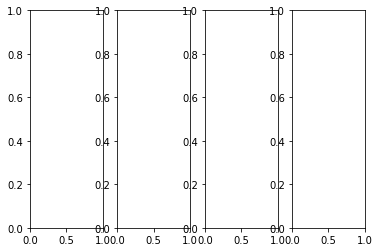

In [9]:
f, axarr = plt.subplots(1, 4)
f.subplots_adjust(hspace=0.5)

for i in range(4):
    axarr[0][i].imshow(np.reshape(X[i],(100,100)), cmap='hot', interpolation='nearest')

In [19]:
# produce prediction file
test_array = np.load('test_images.npy',encoding='latin1')[:,1]
X_test = np.reshape(test_array.tolist(), (-1,100,100,1))
result = np.loadtxt('sample_submission.csv',dtype=str, encoding='latin1',delimiter=',')
y = model.predict(X_test)
sparse_y = [np.argmax(pred) for pred in y]
decoded_y = encoder.inverse_transform(sparse_y)
for i in range(len(decoded_y)):
    result[i+1][1]=decoded_y[i]

print(result)
    
np.savetxt('k_cnn_1_submission.csv', result, delimiter=',', fmt="%s")

[['Id' 'Category']
 ['0' 'sink']
 ['1' 'rollerskates']
 ...
 ['9997' 'rollerskates']
 ['9998' 'skull']
 ['9999' 'rhinoceros']]


In [20]:
np.save("keras_1_X.npy", X)
np.save("keras_1_y.npy", y)

In [21]:
print(encoder.classes_)

['apple' 'empty' 'moustache' 'mouth' 'mug' 'nail' 'nose' 'octagon'
 'paintbrush' 'panda' 'parrot' 'peanut' 'pear' 'pencil' 'penguin' 'pillow'
 'pineapple' 'pool' 'rabbit' 'rhinoceros' 'rifle' 'rollerskates'
 'sailboat' 'scorpion' 'screwdriver' 'shovel' 'sink' 'skateboard' 'skull'
 'spoon' 'squiggle']
